# **HR Analytic: Employee Promotion Prediction**

# **Business Problem Understanding**

##  **Context**

A large company with thousands of employees faces challenges in the promotion process for managerial positions. Currently, promotions are based on periodic evaluations, which often lead to delays in transitioning to new roles. As a result, the organization risks losing potential talent or imbalances in leadership distribution.

This dataset includes various employee-related attributes, such as work experience, past performance, training scores, KPI achievements, as well as demographic factors and recruitment pathways. By analyzing this data, the company aims to identify key factors influencing promotions and build a predictive model to identify candidates with the highest potential for promotion.

## **Stakeholders**

The HR department acts as a key stakeholder in the use of machine learning models designed to help identify and select personnel who meet promotion criteria based on performance parameters, competencies, and fit with the company's strategic goals by minimizing subjective bias, increasing transparency, and optimizing the promotion decision-making process.

## **Problem Statement**

Currently, promotions are based on periodic evaluations, which often lead to delays in transitioning to new roles. As a result, organizations face the risk of losing potential talent or imbalances in leadership distribution. Mistakes in decision-making will result in potential or risk of loss in the development of the company's talent. Among others, there are risks such as loss of moral value, distrust of management in promotion transparency and the problem of quiet quitting which causes hidden costs that result in the obstruction of a work process due to the phenomenon of a candidate withdrawing and resigning without sufficient time or transition period to fill the position they are leaving. supposedly, this can be minimized by handling the right promotion assisted by the machine learning model that we propose.


## **Goals**

The company wants to identify the key factors that influence promotions and build a predictive model to identify the most potential candidates for promotion. and minimize the evaluation process time to determine candidates who have been curated using machine learning models. which can then help the HR or human resource team in the work of sorting candidates who enter human resource planning to then be promoted.

## **Metric Evaluation**

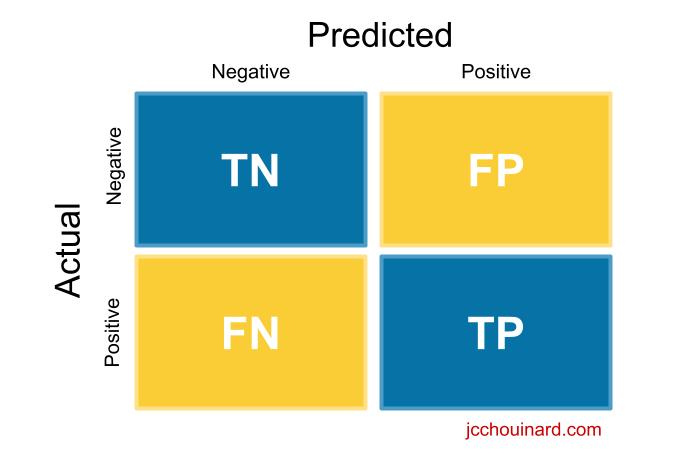

True Positive (TP): Employees who were predicted to be promoted and were actually promoted.
True Negative (TN): Employees who were predicted not to be promoted and were actually not promoted.
False Positive (FP): Employees who were predicted to be promoted but were not actually promoted.
False Negative (FN): Employees who were predicted not to be promoted but were actually promoted.


**Which is More Detrimental: FP or FN?**

In the case of employee promotion prediction, False Negative (FN) is more detrimental than False Positive (FP).
False Positive (FP):

If the model incorrectly predicts that an employee will be promoted when in fact he/she is not, the impact is not too big because it can be handled/reconfirmed by the HR team. However, it causes the HR team to select more candidates for promotion which causes budget waste. The calculation is as follows:

Formula:
Cost per Hour = Monthly Salary/Number of Working Hours per Month
according to [Talenta.co] (https://www.talenta.co/blog/cara-menghitung-cara-hitung-gaji-karyawan-per-jam-harian-perhari/) With a system of 8 working hours a day and 5 working days. The ideal working time in a week is 40 hours and the ideal working time in a month is 40 x 4 weeks, which is 160 hours.

according to [Timedoctor] (https://www.timedoctor.com/blog/average-salary-in-indonesia/) The employee salary for 1 month for the city of Jakarta is Rp. 12,000,000.

Hourly cost:
Salary ÷ working time = 12,000,000 ÷ 160 = Rp75,000/hour.

If 1 HRD spends 40 hours in a month to monitor 10 candidates, the Monitoring Cost is:
Hourly cost x monitoring time = 75,000 x 40 = Rp. 3,000,000 or Rp. 300,000 per person

So, FP causes budget waste, but its impact is easier to control through human validation


**False Negative (FN)**: 

If the model fails to identify employees who are actually worthy of promotion. [Talenta.co] (https://www.talenta.co/blog/promosi-jabatan/ ) states that job promotion is a form of appreciation for employee loyalty and contribution. Without it, employees may feel unappreciated and do quiet quitting. for the calculation is as follows:

Formula:
Productivity Loss for a month = (Normal Productivity x Productivity Decrease) x Number of employees

according to [Govinsider Asia] (https://govinsider-asia.translate.goog/intl-en/article/how-indonesia-is-boosting-workforce-productivity-through-large-scale-training?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=sge) the productivity of the Indonesian workforce is IDR 86.5 million per year for each worker in 2023. So, the value of the productivity of the Indonesian workforce in a month is around IDR 7,200,000 for each worker.

According to [Gallup](https://www.gallup.com/workplace/232955/no-employee-benefit-no-one-talking.aspx), Employees who do quiet quitting can cause a decrease in productivity of 18%. 

If in a month the Company has 5 employees who experience quiet quitting. Then the Cost of Productivity Loss for a month: 
(Normal Productivity x Decrease in Productivity) x Number of employees = (Rp.7,200,000 x 18%) x 5 = Rp.6,480,000 or around Rp.1,300,000 per employee 

So, if the Company does not provide promotions to employees, it has the potential to reduce work motivation. As a result, the company experiences losses due to quiet quitting which will reduce employee retention. If this continues to happen, it will cause Turnover which is a much greater loss.

Based on its consequences, FN has a more detrimental impact than FP. Therefore, although we want to minimize both types of errors, we place a higher priority on preventing the model from Ignoring employees who are worthy of promotion (False Negative) to minimize the loss. Therefore, the main metric we will use is `Recall` because recall Ensures that the model is able to detect as many employees who are truly promoted as possible, even at the risk of more FPs.

In [334]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data splitting
from sklearn.model_selection import train_test_split

# Library preprocessing
from sklearn.compose import ColumnTransformer

# from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# Library untuk missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Library untuk scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# Cross Validation 
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metric Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import warnings
warnings.filterwarnings('ignore')

## **Informasi kolom**

Dataset source: https://www.kaggle.com/datasets/shivan118/hranalysis

| Kolom | Data Type | Deskripsi |
| --- | --- | --- |
| employee_id | Integer | Unique ID for employee |
| department | String | Department of employee |
| region | String | Region of employment (unordered) |
| education | String | Education Level |
| gender | String | Gender of Employee |
| recruitment_channel | String | Channel of recruitment for employee |
| no_of_trainings | Integer | no of other trainings completed in previous year on soft skills, technical skills etc. |
| age | Integer | Age of Employee |
| length_of_service | Integer | Length of service in years |
| KPIs_met >80% | Integer | Do employees meet KPI criteria above 80%? |
| previous_year_rating | Float | Employee Rating for the previous year |
| awards_won | Integer | if awards won during previous year then 1 else 0 |
| avg_training_score | Integer | Average score in current training evaluations |
| is_promoted | Integer | (Target) Recommended for promotion |

In [335]:
df = pd.read_csv('train.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [336]:
display(df.describe(include=object), df.describe())

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [337]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,employee_id,int64,54808,"[51094, 14355]"
1,department,object,9,"[R&D, HR]"
2,region,object,34,"[region_11, region_31]"
3,education,object,3,"[Below Secondary, Master's & above]"
4,gender,object,2,"[f, m]"
5,recruitment_channel,object,3,"[referred, other]"
6,no_of_trainings,int64,10,"[8, 4]"
7,age,int64,41,"[55, 20]"
8,previous_year_rating,float64,5,"[nan, 5.0]"
9,length_of_service,int64,35,"[6, 5]"


- There are five object data type columns, eight integer data type columns, and one float data type column in this dataset, which has 14 columns and 54808 rows. 
- Department, region, education, gender, and recruitment_channel are columns that have object data type.
- Employee_id, no_of_trainings, age, length_of_service, KPIs_met >80%, awards_won?, avg_training_score, and is_promoted are columns with integer data types.
- The previous_year_rating data type is used for columns that include float values.
- There are 54808 distinct values in the Employee_id column.  This suggests that every worker is an individual.  This column is not utilized in modeling since it contains an excessive number of unique values.
- After completing EDA, we will configure the column that will be the feature. The target column in this dataset is is_promoted.

To see the data distribution, outliers, data correlation, and each column's link to the target, we will perform exploratory data analysis (EDA) in the following phase.

# **Exploratory Data Analysis (EDA)**

## **Duplicate**

In [338]:
df.duplicated().sum()

0

We verified that this dataset did not contain any duplicate data that could skew the model.

## **Missing Value**

<Axes: >

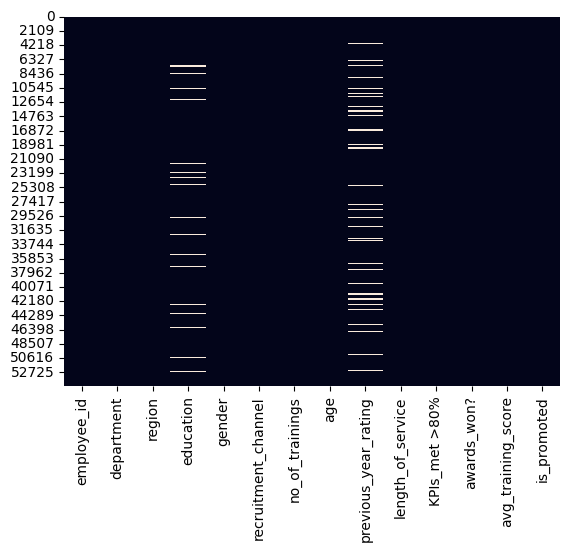

In [339]:
sns.heatmap(df.isna(), cbar=False)

In [340]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                     list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,uniqueSample
0,employee_id,int64,0,0.00,"[1539, 54695]"
1,department,object,0,0.00,"[Analytics, R&D]"
2,region,object,0,0.00,"[region_14, region_18]"
3,education,object,2409,4.40,"[Below Secondary, nan]"
4,gender,object,0,0.00,"[f, m]"
5,recruitment_channel,object,0,0.00,"[other, sourcing]"
6,no_of_trainings,int64,0,0.00,"[2, 3]"
7,age,int64,0,0.00,"[26, 58]"
8,previous_year_rating,float64,4124,7.52,"[4.0, 5.0]"
9,length_of_service,int64,0,0.00,"[25, 5]"


Here are some conclusions drawn from the analysis of the Missing Value table and heatmap graph:
- This dataset has two items with missing values: the Education column and the Previous Year Rating column.
- Only 4.4% of the total data, or 2409 rows, are missing a value for the Education column. The missing value can be handled in a number of ways. We'll fill it in, though.
- Approximately 7.5% of the total data, or 4124 rows, are missing a value for the Previous Year Rating column.  This figure can be classified as having a significant number of missing values.  Therefore, we will fill in this column.

During preprocessing, the missing value will be handled.

## **Outlier**

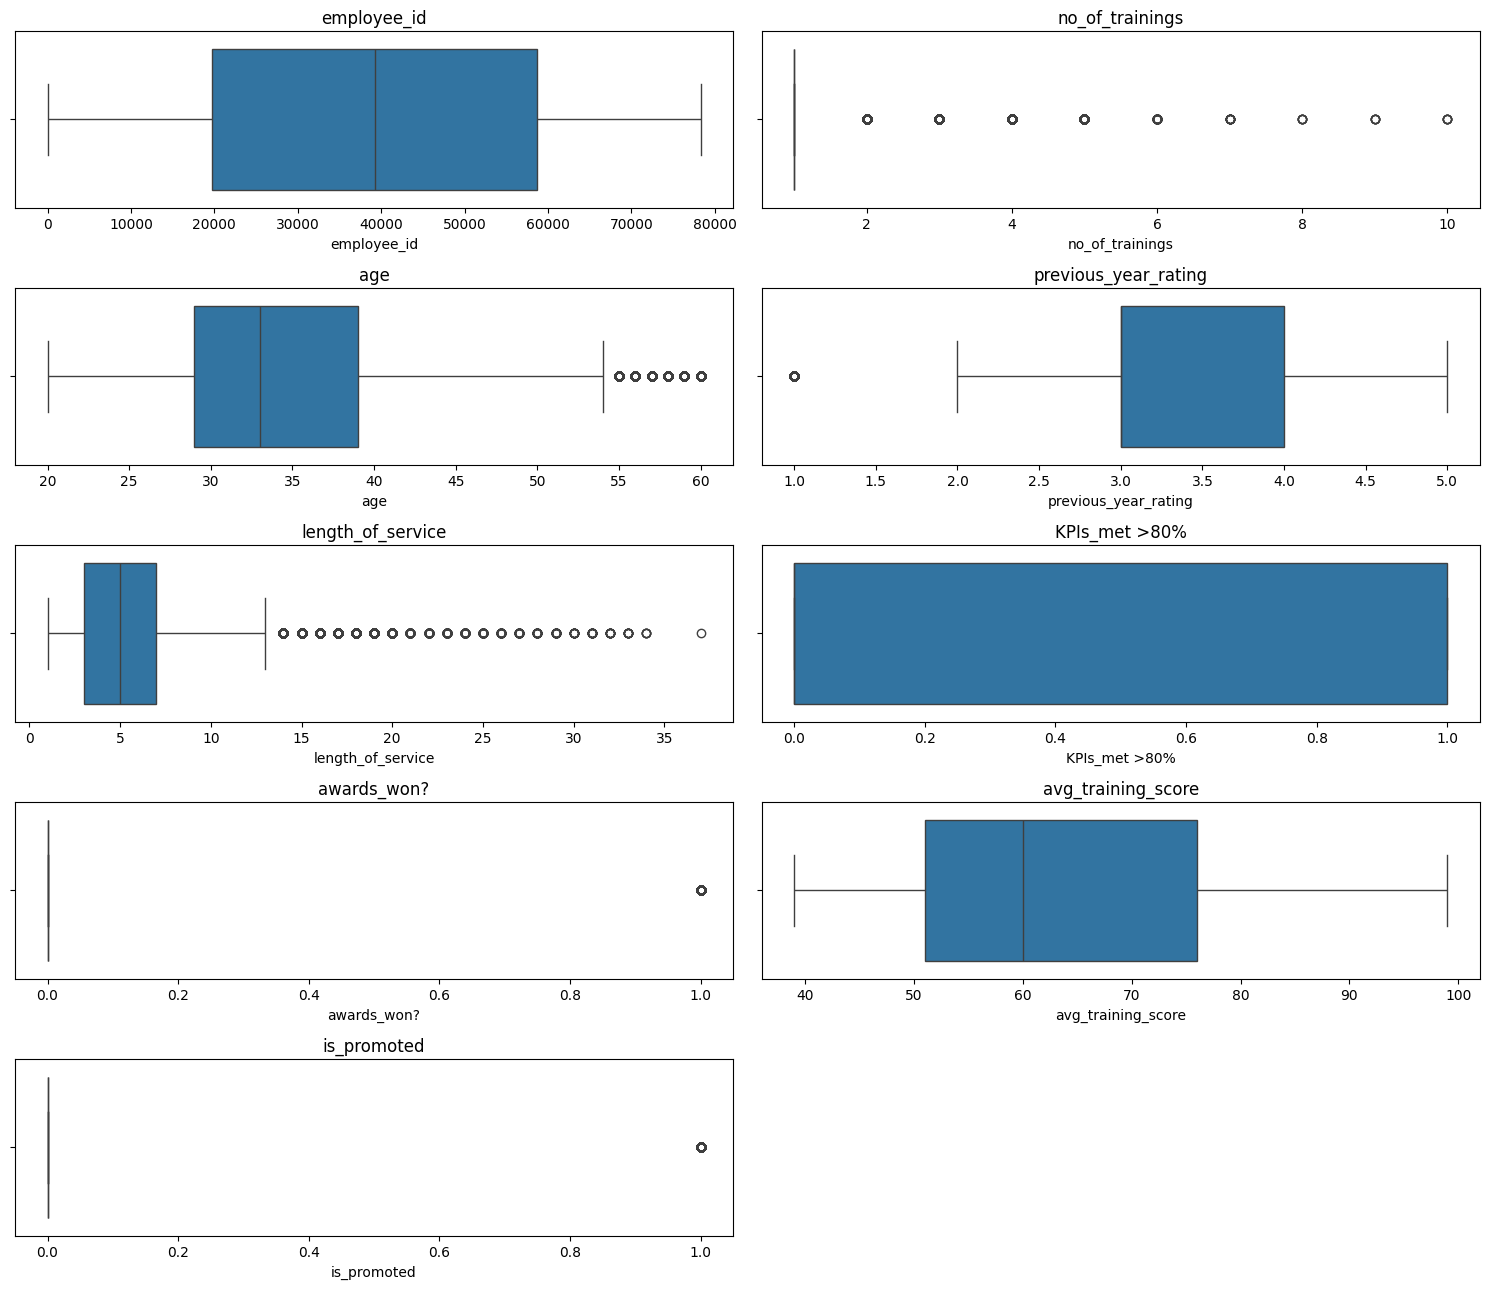

In [341]:
plt.figure(figsize=(15, 13))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 2) + (len(col_num) % 2), 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [342]:
# Daftar kolom numerik yang di cek
kolom = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        kolom.append(i)

# Inisialisasi list untuk menyimpan hasil deteksi outlier
result = []

# Pengecekan outlier menggunakan metode IQR
for col in kolom:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    lower_outliers = df[df[col] < lower_limit][col]
    upper_outliers = df[df[col] > upper_limit][col]
    
    total_outliers = len(lower_outliers) + len(upper_outliers)

    if total_outliers > 0:
        result.append({
            'Kolom': col,
            'Jumlah outlier lower': len(lower_outliers),
            'Jumlah outlier upper': len(upper_outliers),
            'Total outlier (%)': f'{(total_outliers / len(df)) * 100:.2f}%',
            'Nilai outlier lower (<=)': lower_outliers.max() if len(lower_outliers) > 0 else 'None',
            'Nilai outlier upper (>=)': upper_outliers.min() if len(upper_outliers) > 0 else 'None'
        })

# Konversi hasil deteksi outlier ke DataFrame
outlier_df = pd.DataFrame(result)

# Menampilkan tabel outlier
print("Tabel daftar outlier:")
outlier_df

Tabel daftar outlier:


,Kolom,Jumlah outlier lower,Jumlah outlier upper,Total outlier (%),Nilai outlier lower (<=),Nilai outlier upper (>=)
0,no_of_trainings,0,10430,19.03%,None,2
1,age,0,1435,2.62%,None,55
2,previous_year_rating,6223,0,11.35%,1.0,None
3,length_of_service,0,3489,6.37%,None,14
4,awards_won?,0,1270,2.32%,None,1
5,is_promoted,0,4668,8.52%,None,1


Based on the analyzed boxplot graph and outlier table, here are some important insights regarding the data distribution and its potential impact on the analysis:
1. Columns with a high percentage of outliers (which require further identification)
    - `no_of_trainings (19.03% outlier)`
        - The boxplot's right side has a lot of dots, which suggests that the distribution is right-skewed.
        - Employees often only complete one training session. Nonetheless, some workers complete more than one training—some even more than six.
        - This may occur as a result of underperforming employees. As a result, they might receive more training to boost their proficiency or conform to corporate requirements.
    - `previous_year_rating (11.35% outlier)`
        - The majority of outliers are from workers who received a Previous Year Rating of 1.
        - This suggests that the worker performed poorly the year before.
        - When workers perform poorly, it may be a sign that they are having issues. Both in terms of organizational (like failing to set goals or having an unsupportive work culture) and individual (such having health issues or having skills that aren't appropriate for the job) considerations
    - `is_promoted (8.52% outlier)`
        -  A right-skewed distribution is indicated by the large number of dots on the boxplot's right side.
        - The majority of outliers originate from promoted employees (is_promoted = 1), indicating that ~Employees who were promoted `were 8.52%` while the remainder were not promoted. The aim in `this dataset is unbalanced (imbalanced data)` is also demonstrated by this.
    - `length_of_service (6.37% outlier)`
        - The boxplot's right side has a large number of dots that indicate a right-skewed distribution. 
        - Employees with more than 13 years of service account for the majority of the outliers. This indicates that some workers have been with the company for a lot longer than most. This may be a sign of high loyalty workers.
2. Columns with a moderate percentage of Outliers (Need to be checked further)
    - `age (2.62%% outlier)`  
        - The boxplot's right side has a large number of dots that indicate a right-skewed distribution. 
        - The majority of outliers originate from employees who are significantly older than the average; these individuals may hold senior or executive roles and be nearing retirement.
    - `awards_won? (2.32% outlier)`
        - A right-skewed distribution is indicated by the large number of dots on the boxplot's right side.
        - Employees who got awards account for the majority of the outliers (awards_won? = 1).
        - Only 2.32% of employees earned prizes, according to this column; the remaining employees did not.This demonstrates how hard it is to win an award and how only a select few are eligible.

As the outliers only describe data between yes/no, the `awards_won?` and `is_promoted` columns will not be further identified.

## **Correlation**

<Axes: >

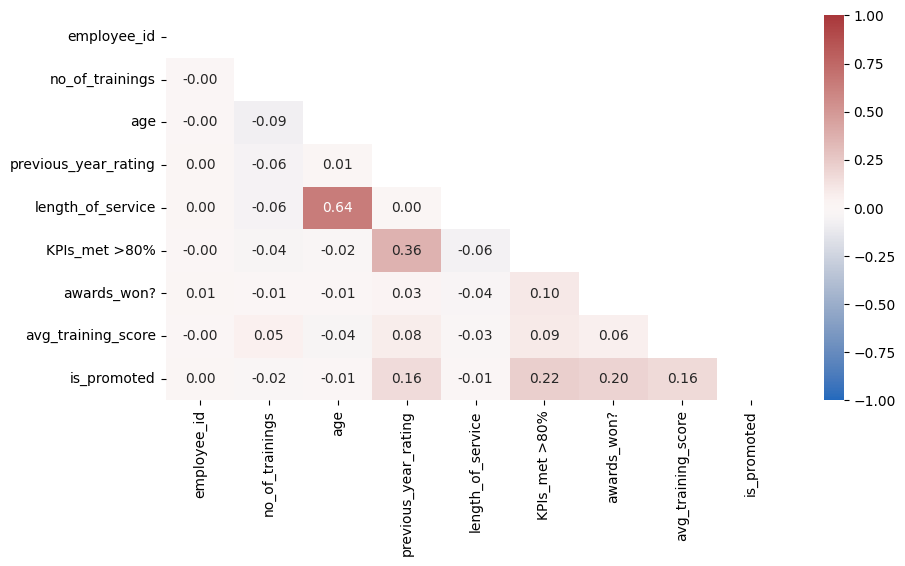

In [343]:
plt.figure(figsize=(10,5))
corr = df.corr('spearman', numeric_only=True)
mask = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='vlag', mask=mask)

Based on the heatmap graph, here are some key insights into data correlation and its potential impact on the analysis:

1. Factors with the highest correlation to promotions ("is_promoted"):
    - `KPIs_met >80%` (0.22) : Promotion is more likely for staff members who achieve KPIs of 80% or higher.
    -  `awards_won?` (0.20) : Award-winning employees have a higher chance of being promoted.
    - `avg_training_score` (0.18) : Promotions are positively connected with higher average training scores. 
    - `previous_year_rating` (0.16) : Promotions are more likely for staff members who received strong performance ratings the year before.
2. Lowly correlated variables with promotion: 
    - `age` (-0.02), `length_of_service` (-0.01), `no_of_trainings` (-0.02) : Promotion is not strongly correlated with age, length of service, or number of trainings.
3. The correlation between the other variables: 
    - `Age` vs `Length_of_Service` (0.66) : Longer tenure is typically attributed to older employees.
    - `KPIs_met >80%` against `Previous_Year_Rating` (0.35) : Performance ratings are generally higher for employees with high KPIs.


# **Preprocessing**

## **Data Cleaning**

### **Missing Value**

<Axes: >

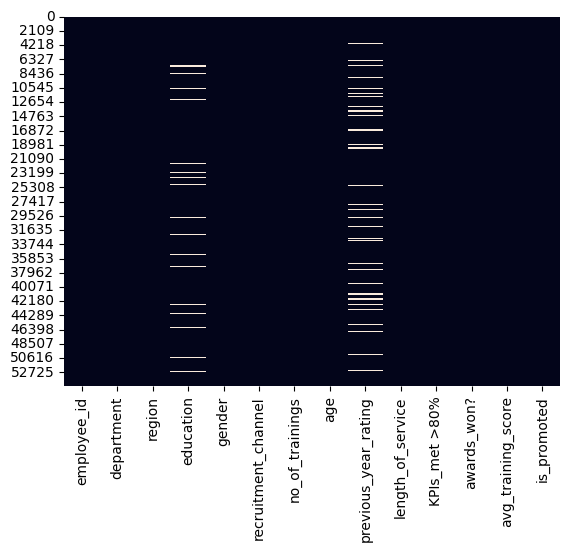

In [344]:
sns.heatmap(df.isna(), cbar=False)

In [345]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                     list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,uniqueSample
0,employee_id,int64,0,0.00,"[20945, 50450]"
1,department,object,0,0.00,"[R&D, Procurement]"
2,region,object,0,0.00,"[region_22, region_34]"
3,education,object,2409,4.40,"[Master's & above, Below Secondary]"
4,gender,object,0,0.00,"[f, m]"
5,recruitment_channel,object,0,0.00,"[other, referred]"
6,no_of_trainings,int64,0,0.00,"[2, 1]"
7,age,int64,0,0.00,"[47, 43]"
8,previous_year_rating,float64,4124,7.52,"[nan, 5.0]"
9,length_of_service,int64,0,0.00,"[7, 9]"


#### **Education**

We will use **mode** to fill in the missing values ​​in the `education` column because the percentage of missing values ​​is relatively small, which is only around **4.4%** of the total data. Because the percentage of missing values ​​is relatively small, filling in using **mode will not significantly affect the data distribution and will not cause major bias or distortion in subsequent models/statistics**.

In [346]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

<Axes: >

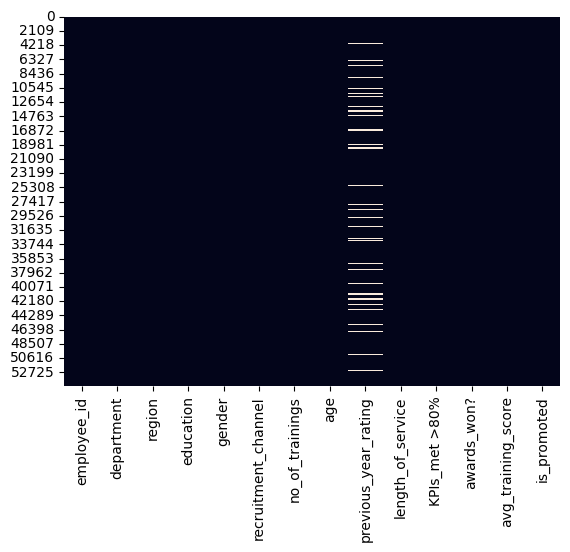

In [347]:
sns.heatmap(df.isna(), cbar=False)

#### **Previous Year Rating**

In [348]:
df_null_rate = df[df['previous_year_rating'].isna()]
df_null_rate

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Bachelor's,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


If we look at the table above, the missing values ​​come from employees who have only worked for 1 year (Length of Service = 1). Therefore, we will fill in the missing values ​​with 0 to indicate that they do not have an assessment yet because they are still junior.

In [349]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(0)

<Axes: >

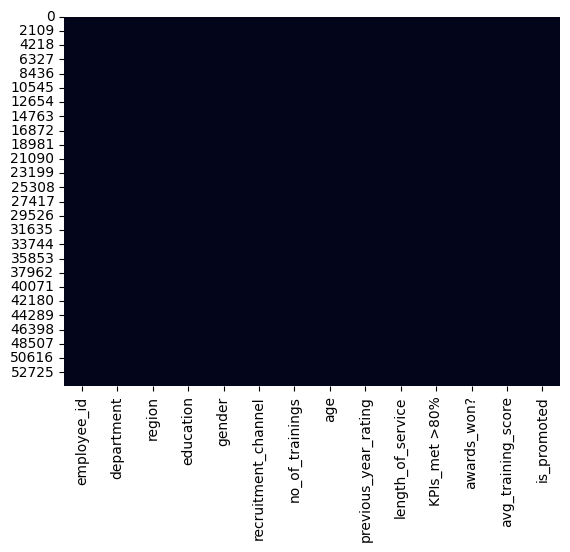

In [350]:
sns.heatmap(df.isna(), cbar=False)

### **Outlier**

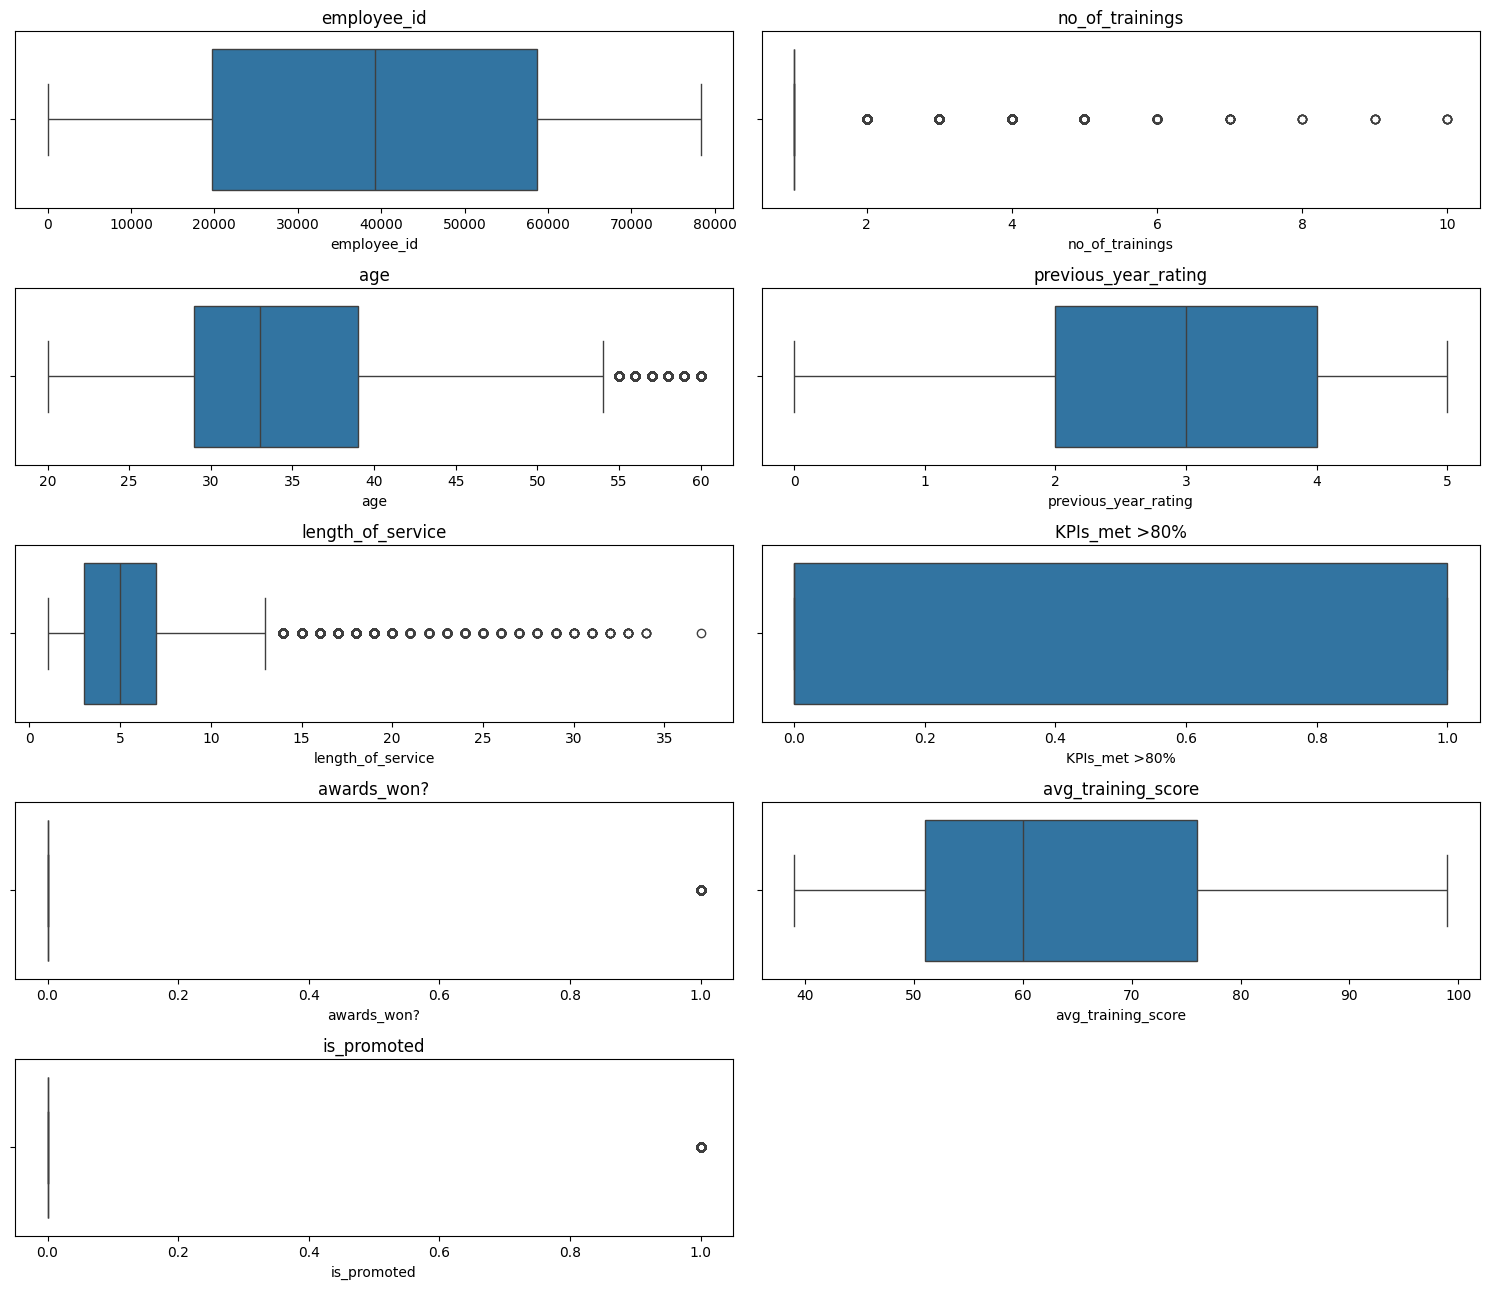

In [351]:
plt.figure(figsize=(15, 13))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 2) + (len(col_num) % 2), 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [352]:
# Daftar kolom numerik yang di cek
kolom = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        kolom.append(i)

# Inisialisasi list untuk menyimpan hasil deteksi outlier
result = []

# Pengecekan outlier menggunakan metode IQR
for col in kolom:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    lower_outliers = df[df[col] < lower_limit][col]
    upper_outliers = df[df[col] > upper_limit][col]
    
    total_outliers = len(lower_outliers) + len(upper_outliers)

    if total_outliers > 0:
        result.append({
            'Kolom': col,
            'Jumlah outlier lower': len(lower_outliers),
            'Jumlah outlier upper': len(upper_outliers),
            'Total outlier (%)': f'{(total_outliers / len(df)) * 100:.2f}%',
            'Nilai outlier lower (<=)': lower_outliers.max() if len(lower_outliers) > 0 else 'None',
            'Nilai outlier upper (>=)': upper_outliers.min() if len(upper_outliers) > 0 else 'None'
        })

# Konversi hasil deteksi outlier ke DataFrame
outlier_df = pd.DataFrame(result)

# Menampilkan tabel outlier
print("Tabel daftar outlier:")
outlier_df

Tabel daftar outlier:


,Kolom,Jumlah outlier lower,Jumlah outlier upper,Total outlier (%),Nilai outlier lower (<=),Nilai outlier upper (>=)
0,no_of_trainings,0,10430,19.03%,None,2
1,age,0,1435,2.62%,None,55
2,length_of_service,0,3489,6.37%,None,14
3,awards_won?,0,1270,2.32%,None,1
4,is_promoted,0,4668,8.52%,None,1


#### **Number of Trainings**

The typical amount of training that employees need is **1–5 trainings**, which includes both basic and specialized training.  Most employees attend **basic training** because it is basic or standard, such as business orientation, introduction to SOPs, or other required programs.  In the meantime, most employees do not attend **special training** like project management training, the newest technology, or particular certificates to improve competency in certain disciplines, possibly because the demands of the role do not call for additional growth.  We can determine its competency by looking at its performance, but if the number of trainings **exceeds 5 times**, this requires more attention.

In [353]:
out = df[df['no_of_trainings'] > 5][['no_of_trainings', 'avg_training_score', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'length_of_service']]

# performa karyawan dengan jumlah pelatihan berlebih
print('Performa karyawan dengan jumlah pelatihan berlebih:')
print('Rata-rata Nilai Pelatihan:', out['avg_training_score'].mean().round(2))
print('Rata-rata Nilai Tahun Sebelumnya:', out['previous_year_rating'].median())
print('Rata-rata KPI Terpenuhi (0: Tidak terpenuhi/1: Terpenuhi):', out['KPIs_met >80%'].median())
print('Rata-rata Penghargaan Didapat (0: Tidak Dapat/1: Dapat) :', out['awards_won?'].median())

Performa karyawan dengan jumlah pelatihan berlebih:
Rata-rata Nilai Pelatihan: 60.24
Rata-rata Nilai Tahun Sebelumnya: 3.0
Rata-rata KPI Terpenuhi (0: Tidak terpenuhi/1: Terpenuhi): 0.0
Rata-rata Penghargaan Didapat (0: Tidak Dapat/1: Dapat) : 0.0


As can be seen from their performance, the employee with the most number of lessons (>5) is **employee with the lowest level of proficiency with a Average Training Score of just 60.24**.  This phenomenon may occur because a worker with below-average skills will typically receive additional training to improve performance.

As a result, **Any anomaly data in this column will be ignored.** will be discussed.  To avoid overscaling the model, we will use a **robust scaler** that is more robust against outliers because it uses the median and interquartile range (IQR) as its foundation.

#### **Age**

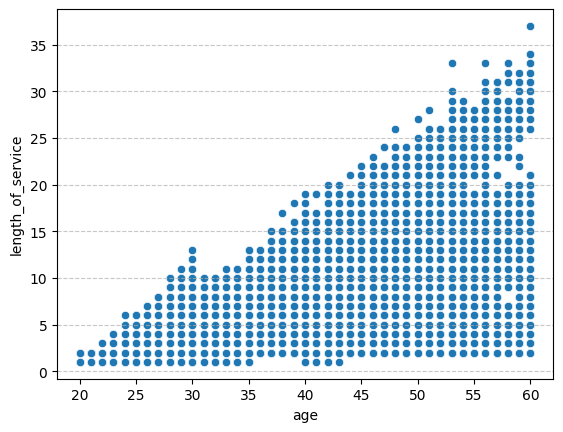

In [354]:
sns.scatterplot(df, y='length_of_service', x='age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

With a significant 66% association between age and tenure, the data indicates that **older employees generally have longer tenure**. There are, however, certain exceptional instances, such as workers who are above 50 and have a brief tenure. **These anomalies, including fast-track hiring or the unexpected requirement for certain skills or expertise, should not be eliminated because they highlight the diversity of HR policies**.

### **Rename Column**

The columns `award_won?` and `KPIs_met >80%` will be renamed since they contain characters like `?`, `>`, and `space` that might lead to technical issues when processing data, particularly when developing functions. Furthermore, the use of symbols may make columns less readable and inconsistent in their name. Therefore, we will rename these columns to `kpis_met_over_80` and `award_won`.

In [355]:
df.rename(columns={
    "awards_won?": "award_won",
    "KPIs_met >80%": "kpis_met_over_80"
}, inplace=True)


### **Saving Dataset After Cleaning**

In [356]:
# Save the cleaned DataFrame into a CSV file
df=df.reset_index(drop=True)

df.to_excel('Data Clean HR Employee Promotion.xlsx', index=False)

## **Define X & Y**

In [357]:
X = df.drop(columns=['is_promoted', 'employee_id'])
y = df['is_promoted']

## **Splitting**

In [358]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0,
    stratify = y
)

## **Encoding & Scaling**

Let's now perform some scaling and encoding for this dataset's numerical and categorical attributes. 
We'll do the following:

| Preprocessing | Method | Kolom | Alasan |
| --- | --- | --- | --- |
| Encoding | One Hot | gender, award_won, previous_year_rating, recruitment_channel, kpis_met_over_80 | because the data in these features is categorical and lacks an ordinal or sequence. |
|   | Ordinal | Education | because there is a sequence of educational degrees in this feature. We will alter it to 1 for the below-secondary degree, 2 for the bachelor's degree, and 3 for the master's and above degrees. |
|  | Binary | region, department | Because the data in these characteristics is categorical and contains a sizable number of distinct attributes. |
| Scaling | Robust Scaler | age, avg_training_score, no_of_trainings, length_of_service | Because robust scaling is more resilient to non-normal distributions and outliers. |

In [359]:
ordinal_encoding = [{
    "col": "education",
    "mapping": {'Below Secondary': 1,
                "Bachelor's": 2,
                "Master's & above": 3}}
]

In [360]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), [ 'gender', 'award_won', 'previous_year_rating',
                                 'recruitment_channel', 'kpis_met_over_80']),
    ('ordinal', OrdinalEncoder(cols=["education"], mapping=ordinal_encoding), ["education"]),
    ('binary', BinaryEncoder(), ['region', 'department']),
    ('pipe_line', RobustScaler(), [ 'age', 'avg_training_score', 'no_of_trainings', 'length_of_service'])
], remainder='passthrough')

In [361]:
# fitting
transformer.fit(X_train)

# transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

# **Methodology (Data Analytics)**

## **Number of Employees Promotion**

In [362]:
df['is_promoted'].value_counts(normalize=True)

is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64

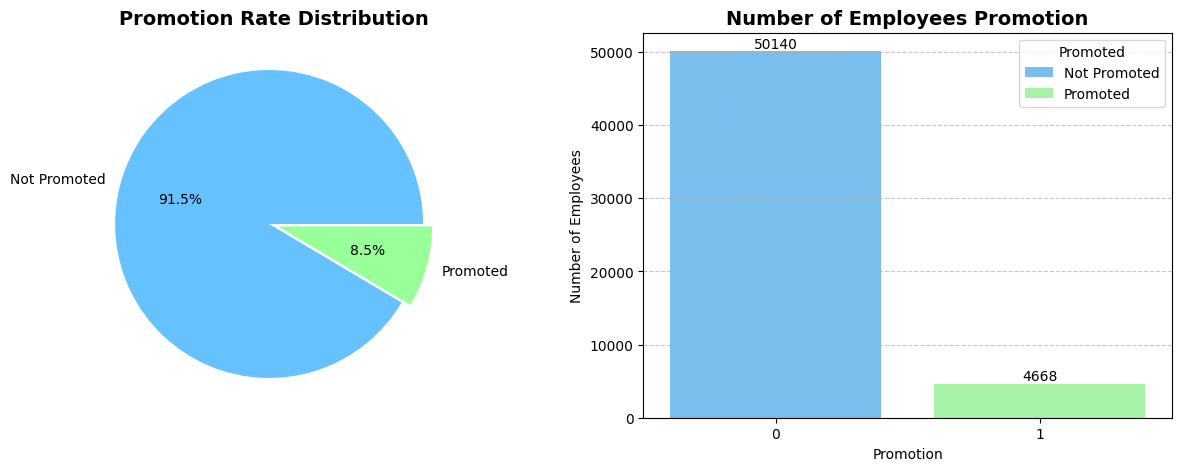

In [363]:
plt.figure(figsize=(15,5))

# Chart Promotion Rate Distribution 
plt.subplot(1,2,1)

# Total Employees By Gender 
total_promoted = df['is_promoted'].value_counts()

# Piechart
plt.pie(total_promoted, labels=['Not Promoted', 'Promoted'], autopct='%1.1f%%',
        colors= ['#66c2ff', '#99ff99'],explode=[0.03] * len(total_promoted))  

# Titles and labels
plt.title('Promotion Rate Distribution', fontsize=14, fontweight='bold')

# Chart Promotion Rate Distribution 
plt.subplot(1,2,2)

bars = sns.countplot(data=df, x='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees Promotion", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Promotion")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)

A total of 4,668 employees, representing **8.5% of the total workforce**, received promotions, while the remaining 50,140 employees (91.5%) were not promoted. The average annual promotion rate in the US according to the [ADP Research Institute](https://www.adp.com/resources/articles-and-insights/adp-research-institute/research-topics/-/media/62FB03253C3B4B80A2EE73EB8EC29B82.ashx?utm_source=chatgpt.com) is 10%. This relatively **low promotion rate of 8.5%** may suggest **limited career advancement opportunities** or a **highly competitive internal environment**. It could also reflect budget constraints or a flat organizational hierarchy.

## **Demographic Factors**

Demographic factors describe personal employee characteristics that are **usually not directly controllable by the organization**. These factors will be used as analysis material to see **whether they are related to the promotion process** based on `age`, `gender`, `education` level, and work location (`region`).

### **Age**

In [364]:
# Grouping data by Age and Promotion
age_summary = df.groupby(['age', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
age_summary.columns = ['age', 'Not_Promoted', 'Promoted']

# Added total employee column for each Age category
age_summary['Total_Employee'] = age_summary['Promoted'] + age_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
age_summary['Promotion_Rate (%)'] = (age_summary['Promoted'] / age_summary['Total_Employee'] * 100).round(2)

# Sort data by % promotion from highest to lowest
age_summary = age_summary.sort_values(by='Promotion_Rate (%)', ascending=False).head(10)

# Calculates the Total Employee percentage (% promotion) and rounds to 2 decimal places.
age_summary['Total_Employee_Rate (%)'] = (age_summary['Total_Employee'] / age_summary['Total_Employee'].sum() * 100).round(2)

# Displays the analysis results table
age_summary

,age,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%),Total_Employee_Rate (%)
15,35,2428,283,2711,10.44,10.36
13,33,2891,319,3210,9.94,12.26
8,28,2839,308,3147,9.79,12.02
18,38,1739,184,1923,9.57,7.35
19,39,1534,161,1695,9.50,6.48
14,34,2790,286,3076,9.30,11.75
7,27,2566,261,2827,9.23,10.80
10,30,3341,324,3665,8.84,14.00
11,31,3224,310,3534,8.77,13.50
31,51,355,34,389,8.74,1.49


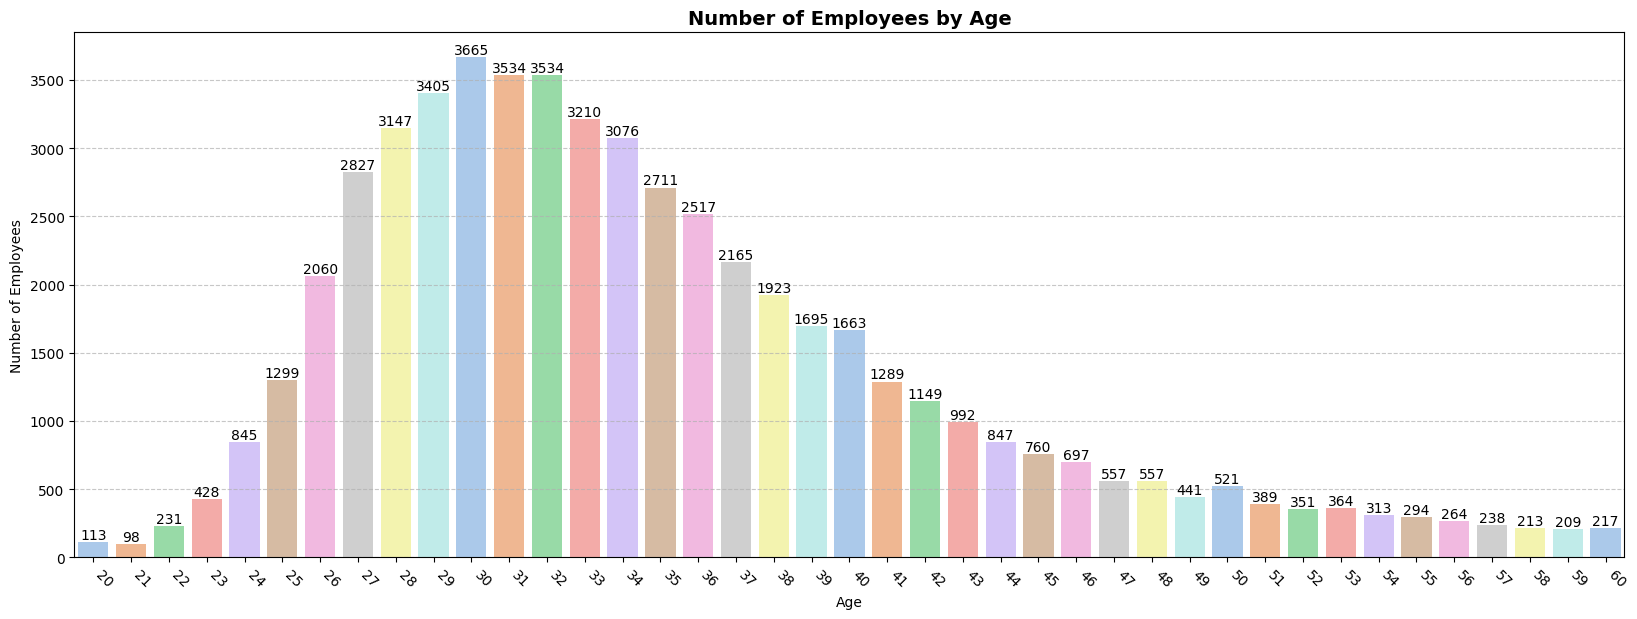

In [365]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
bars = sns.countplot(df, x='age', palette='pastel')

# Titles and labels
plt.title("Number of Employees by Age", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Age")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)

The employee age distribution reveals that the majority of the workforce falls within the **26 to 36-year-old** range, with the highest concentration at age **30 (3,665 employees)**. The number of employees begins to increase significantly from age 24 and peaks around early 30s, after which it **gradually declines**. This suggests that the organization's employee base is **predominantly young to early-mid career professionals**. Meanwhile, older employees (age 45 and above) represent a **much smaller portion** of the workforce.

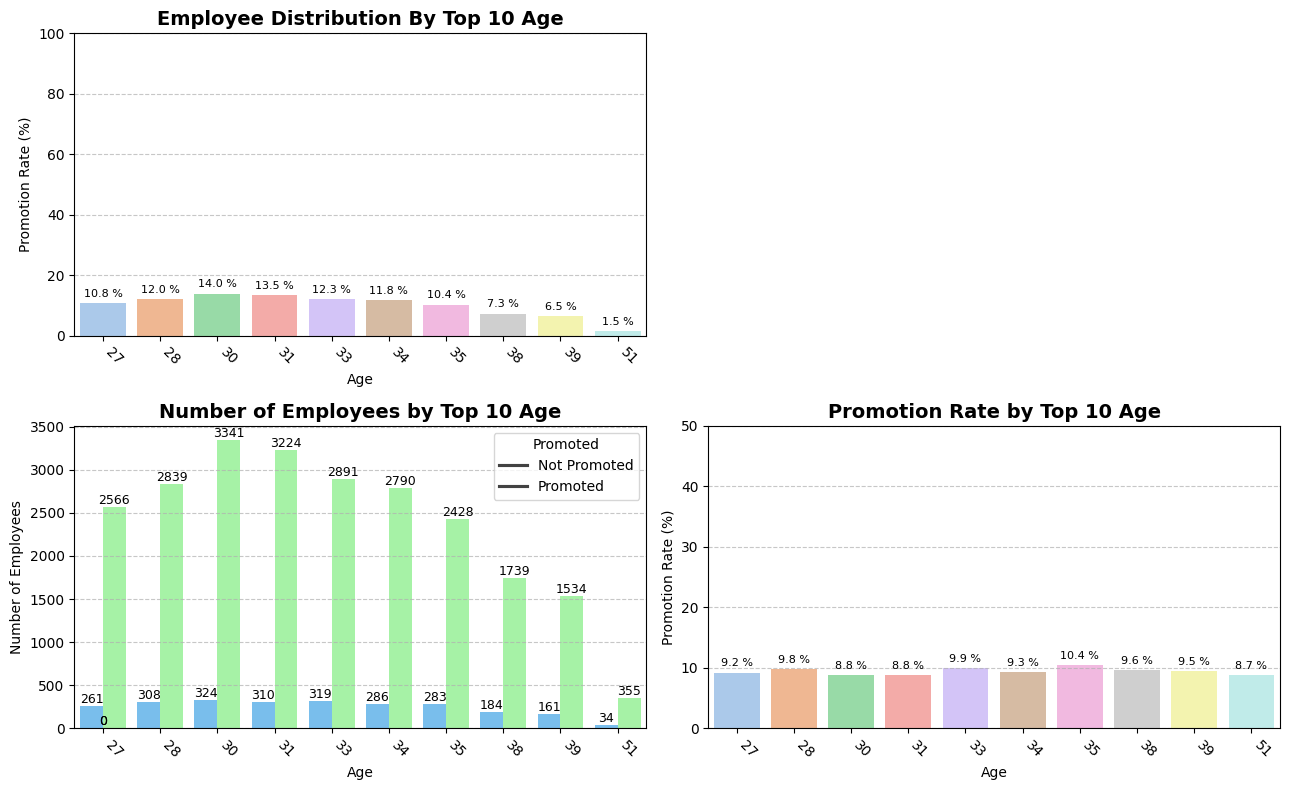

In [366]:
plt.figure(figsize=(13,8))

# Chart Employees Distribution By Age 
plt.subplot(2,2,1)

ax = sns.barplot(data=age_summary, x='age', y='Total_Employee_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Employee Distribution By Top 10 Age", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Age")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Chart Number of Employees by Age
plt.subplot(2,2,3)

# Melt data to long format for countplot
los_melted = age_summary.melt(
    id_vars='age', 
    value_vars=['Promoted', 'Not_Promoted'], 
    var_name='Promotion_Status', 
    value_name='Count'
)

# Set up the plot
ax = sns.barplot(data=los_melted, x='age', y='Count', hue='Promotion_Status', palette=['#66c2ff', '#99ff99'])
# Titles and labels
plt.title("Number of Employees by Top 10 Age", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Age")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)
    
# Chart Promotion Rate by Age
plt.subplot(2,2,4)

ax = sns.barplot(data=age_summary, x='age', y='Promotion_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Promotion Rate by Top 10 Age", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Age")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 50)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

### **Gender**

In [367]:
# Grouping data by Gender and Promotion
gender_summary = df.groupby(['gender', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
gender_summary.columns = ['gender', 'Not_Promoted', 'Promoted']

# Added total employee column for each Gender category
gender_summary['Total_Employee'] = gender_summary['Promoted'] + gender_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
gender_summary['Promotion_Rate (%)'] = (gender_summary['Promoted'] / gender_summary['Total_Employee'] * 100).round(2)

# Sort data by % promotion from highest to lowest
gender_summary = gender_summary.sort_values(by='Promotion_Rate (%)', ascending=False)

# Displays the analysis results table
gender_summary

,gender,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%)
0,f,14845,1467,16312,8.99
1,m,35295,3201,38496,8.32


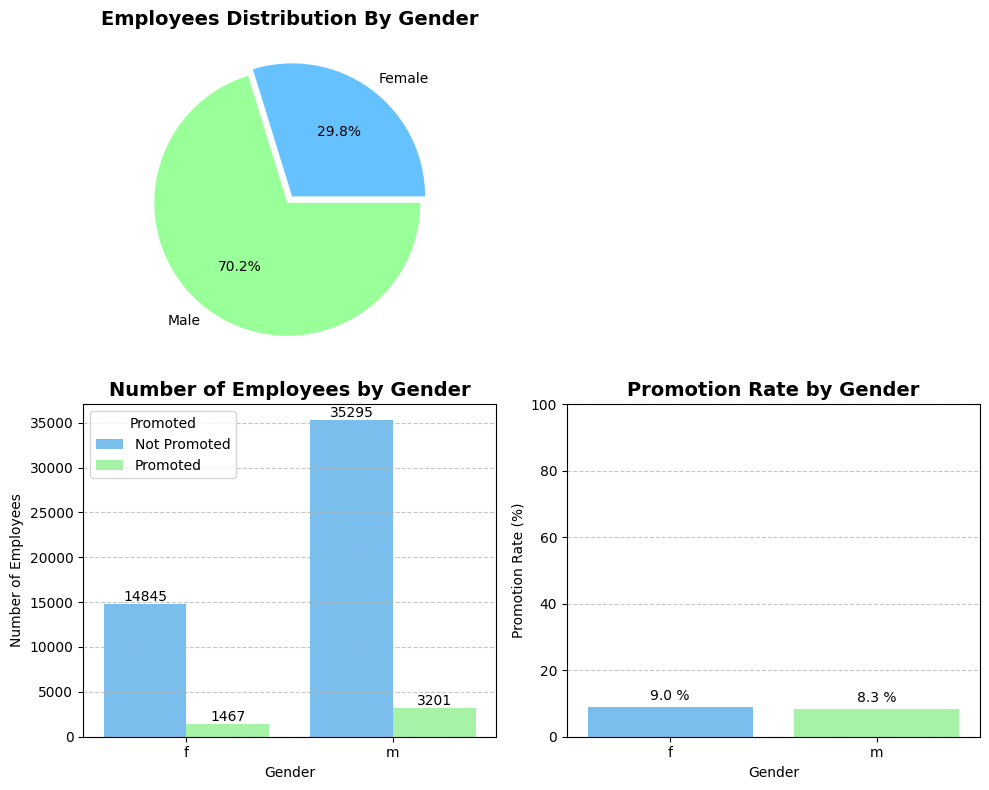

In [368]:
plt.figure(figsize=(10,8))

# Chart Employees Distribution By Gender 
plt.subplot(2,2,1)

# Total Employees By Gender 
total_emp = gender_summary['Total_Employee']

# Piechart
plt.pie(total_emp, labels=['Female', 'Male'], autopct='%1.1f%%',
        colors= ['#66c2ff', '#99ff99'],explode=[0.03] * len(total_emp))  

# Titles and labels
plt.title('Employees Distribution By Gender', fontsize=14, fontweight='bold')

# Chart Number of Employees by Gender
plt.subplot(2,2,3)
bars = sns.countplot(data=df, x='gender', hue='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees by Gender", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)
    
# Chart Promotion Rate by Gender
plt.subplot(2,2,4)
ax = sns.barplot(data=gender_summary, x='gender', y='Promotion_Rate (%)', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Promotion Rate by Gender", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Gender")
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Female employees have a promotion rate of **9.0%**, while male employees have a slightly lower promotion rate of **8.3%**. The difference in promotion rate between genders is relatively small, only about **0.7%**, suggesting that **gender does not significantly influence the likelihood of being promoted**. This implies that, once part of the organization, both male and female employees are promoted at similar rates. However, it's important to note that **male employees dominate the workforce composition (70.2%)**, which results in a higher absolute number of male promotions despite the slightly lower rate.

### **Education**

In [369]:
# Grouping data by Education and Promotion
education_summary = df.groupby(['education', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
education_summary.columns = ['education', 'Not_Promoted', 'Promoted']

# Added total employee column for each Education category
education_summary['Total_Employee'] = education_summary['Promoted'] + education_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
education_summary['Promotion_Rate (%)'] = (education_summary['Promoted'] / education_summary['Total_Employee'] * 100).round(2)

# Sort data by % promotion from highest to lowest
education_summary = education_summary.sort_values(by='Promotion_Rate (%)', ascending=False)

# Displays the analysis results table
education_summary

,education,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%)
2,Master's & above,13454,1471,14925,9.86
1,Below Secondary,738,67,805,8.32
0,Bachelor's,35948,3130,39078,8.01


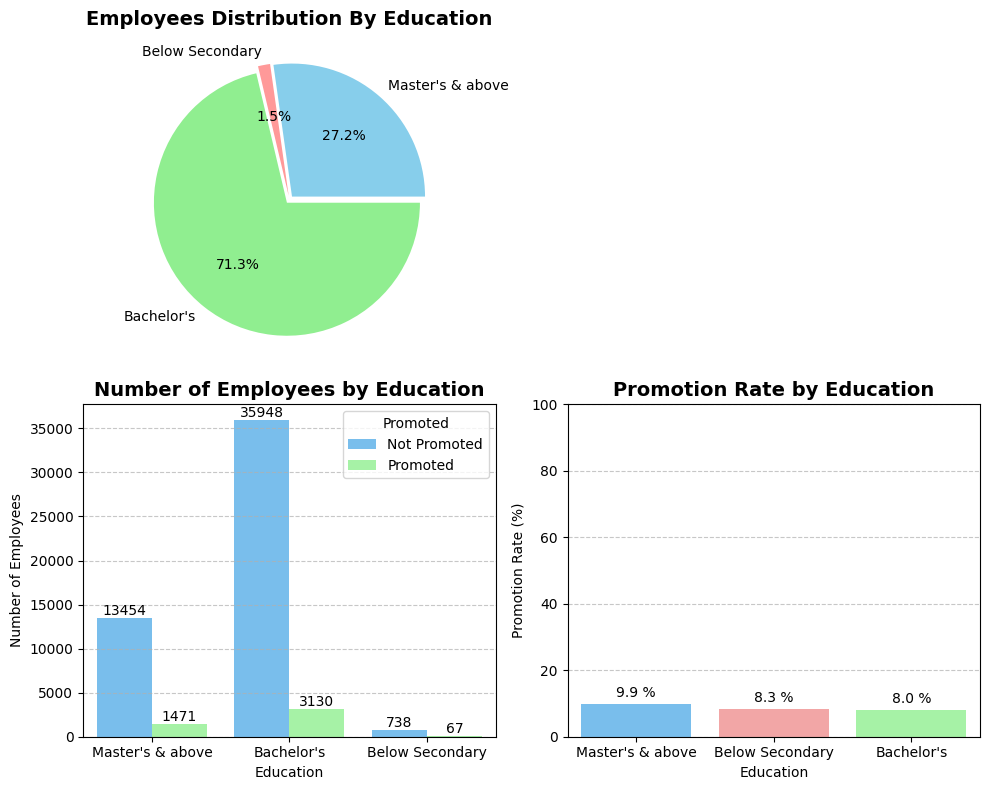

In [370]:
plt.figure(figsize=(10,8))

# Chart Employees Distribution By Education 
plt.subplot(2,2,1)

# Total Employees By Education 
total_emp = education_summary['Total_Employee']

# Piechart
plt.pie(total_emp, labels=education_summary['education'].values, autopct='%1.1f%%',
        colors= ['skyblue', '#ff9999', 'lightgreen'],explode=[0.03] * len(total_emp))  

# Titles and labels
plt.title('Employees Distribution By Education', fontsize=14, fontweight='bold')

# Chart Number of Employees by Education
plt.subplot(2,2,3)
bars = sns.countplot(data=df, x='education', hue='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees by Education", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Education")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)
    
# Chart Promotion Rate by Education
plt.subplot(2,2,4)
ax = sns.barplot(data=education_summary, x='education', y='Promotion_Rate (%)', palette=['#66c2ff', '#ff9999', '#99ff99'])

# Titles and labels
plt.title("Promotion Rate by Education", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Education")
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Employees with a Master’s degree or higher have a promotion rate of **9.2%**, followed by employees with below secondary education at **8.3%**, and those with a Bachelor's degree at **8.2%**. The differences in promotion rates across education levels are relatively small (**less than 1%**), suggesting that **educational attainment does not significantly influence the likelihood of being promoted**. However, it is important to note that **the majority of the workforce holds a Bachelor's degree (68.0%)**, which leads to the highest absolute number of promotions occurring within this group despite their slightly lower promotion rate. This indicates that workforce composition plays a key role in the overall promotion distribution across education levels.

### **Region**

In [371]:
# Grouping data by Region and Promotion
region_summary = df.groupby(['region', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
region_summary.columns = ['region', 'Not_Promoted', 'Promoted']

# Added total employee column for each Region category
region_summary['Total_Employee'] = region_summary['Promoted'] + region_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
region_summary['Promotion_Rate (%)'] = (region_summary['Promoted'] / region_summary['Total_Employee'] * 100).round(2)

# Sort data top 10 by % promotion from highest to lowest
region_summary = region_summary.sort_values(by='Promotion_Rate (%)', ascending=False).head(10)

# Calculates the Total Employee percentage (% promotion) and rounds to 2 decimal places.
region_summary['Total_Employee_Rate (%)'] = (region_summary['Total_Employee'] / region_summary['Total_Employee'].sum() * 100).round(2)

# Displays the analysis results table
region_summary

,region,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%),Total_Employee_Rate (%)
28,region_4,1457,246,1703,14.45,9.11
8,region_17,687,109,796,13.69,4.26
17,region_25,716,103,819,12.58,4.38
20,region_28,1164,154,1318,11.68,7.05
15,region_23,1038,137,1175,11.66,6.29
14,region_22,5694,734,6428,11.42,34.38
22,region_3,309,37,346,10.69,1.85
31,region_7,4327,516,4843,10.65,25.91
0,region_1,552,58,610,9.51,3.26
23,region_30,598,59,657,8.98,3.51


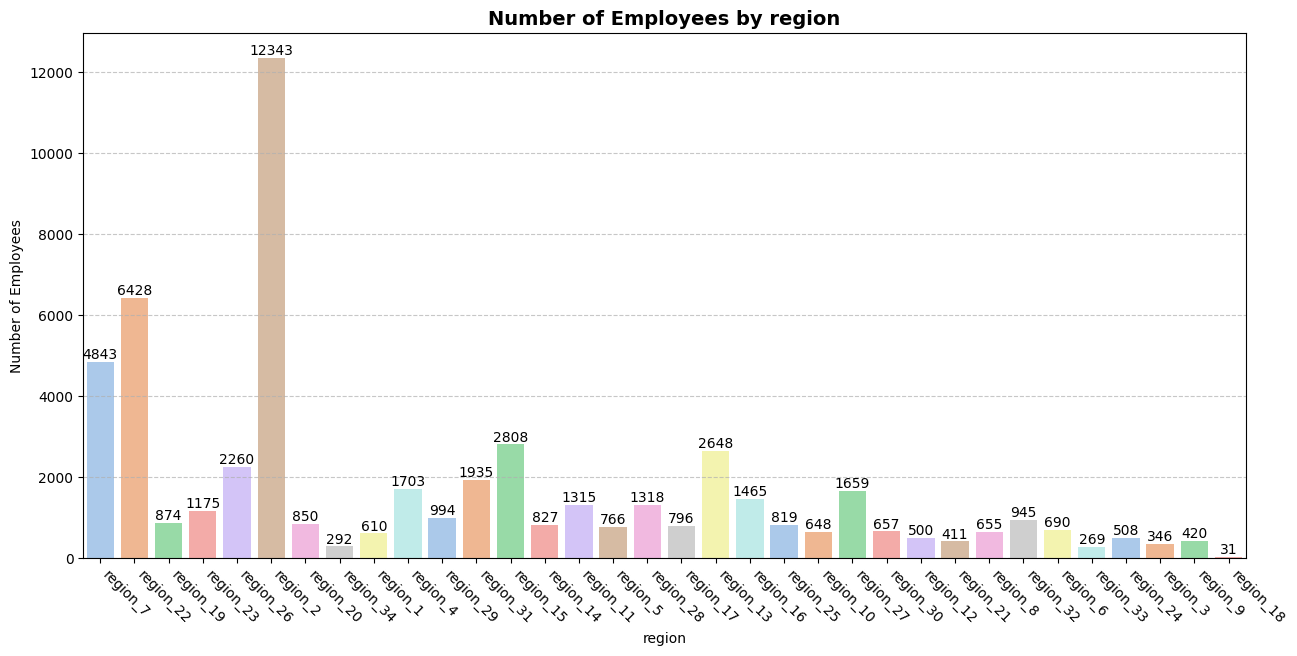

In [372]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
bars = sns.countplot(df, x='region', palette='pastel')

# Titles and labels
plt.title("Number of Employees by region", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("region")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)


Region_23 has the highest number of employees (**12,343**), followed by Region_7 (**4,837**) and Region_1 (**610**). In contrast, regions such as Region_18 (**31 employees**) and Region_3 (**346 employees**) have significantly smaller workforce sizes. The difference in employee distribution across regions is substantial, suggesting that **workforce concentration is highly uneven**. This may reflect the organization's operational priorities, regional business size, or market demand. Consequently, **strategic HR initiatives such as training, retention programs, or talent acquisition may need to be regionally customized**, focusing more on regions with higher workforce concentrations like Region_23 and Region_7.

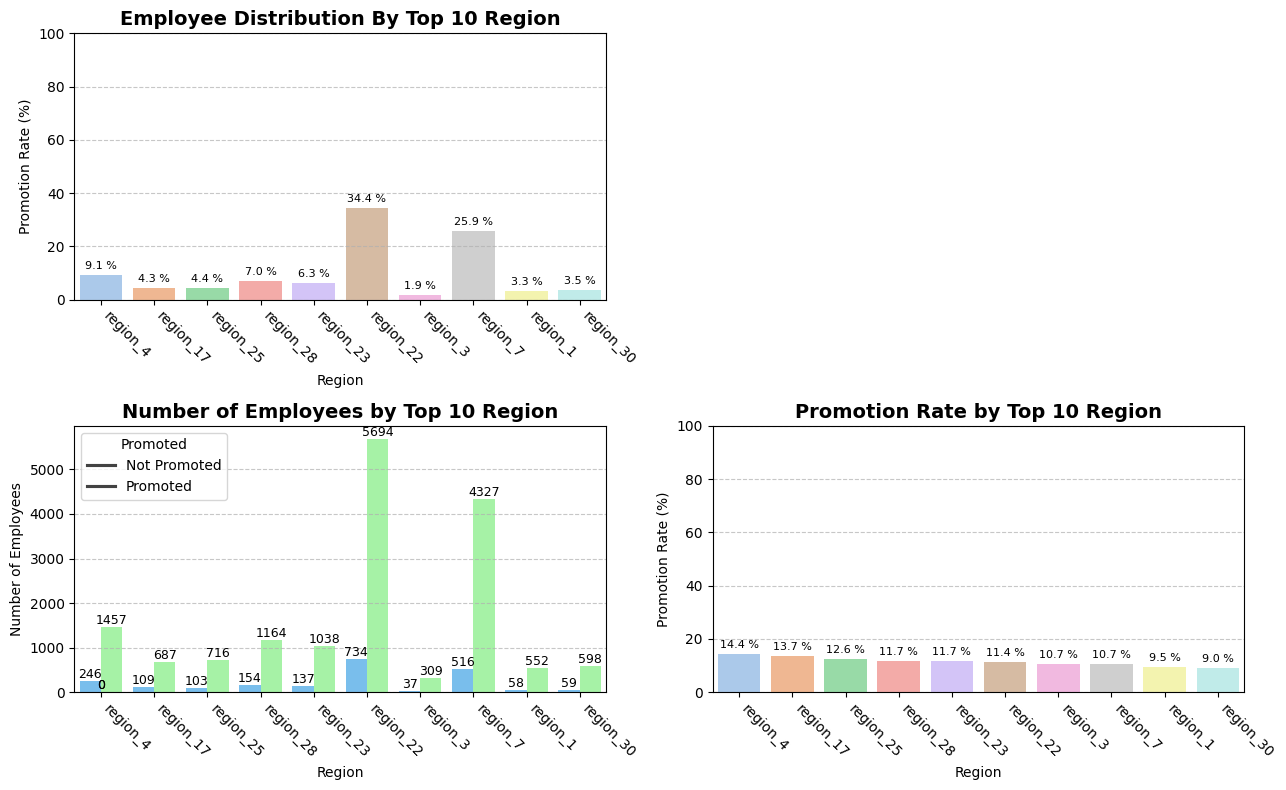

In [373]:
plt.figure(figsize=(13,8))

# Chart Employees Distribution By Region 
plt.subplot(2,2,1)

ax = sns.barplot(data=region_summary, x='region', y='Total_Employee_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Employee Distribution By Top 10 Region", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Region")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Chart Number of Employees by Region
plt.subplot(2,2,3)

# Melt data to long format for countplot
region_melted = region_summary.melt(
    id_vars='region', 
    value_vars=['Promoted', 'Not_Promoted'], 
    var_name='Promotion_Status', 
    value_name='Count'
)

# Set up the plot
ax = sns.barplot(data=region_melted, x='region', y='Count', hue='Promotion_Status', palette=['#66c2ff', '#99ff99'])
# Titles and labels
plt.title("Number of Employees by Top 10 Region", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Region")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)
    
# Chart Promotion Rate by Region
plt.subplot(2,2,4)
ax = sns.barplot(data=region_summary, x='region', y='Promotion_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Promotion Rate by Top 10 Region", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Region")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Region_4 has the highest promotion rate among the top 10 regions at **14.4%**, followed closely by Region_17 (**13.7%**) and Region_25 (**12.6%**). On the other hand, Region_30 has the lowest promotion rate at **9.0%**, with Region_1 (**9.5%**) and Region_7 (**10.7%**) also showing relatively lower rates. Despite having the **largest workforce share (34.4%)**, Region_22 only has a promotion rate of **11.4%**, slightly below the top-promoting regions.

This suggests that **promotion opportunities are not evenly distributed across regions**, and higher workforce concentration does not necessarily translate to a higher promotion rate. It’s important to note that **Region_22 and Region_7 together make up over 60% of the top 10 regions’ employee distribution**, meaning their promotion policies can significantly impact the organization’s overall talent development. This imbalance indicates a potential need to **evaluate regional promotion practices and ensure equal access to career advancement across all locations**.

## **Employee Performance Factors**

These are the factors that most directly reflect the **quality of employee work and contribution**. These factors will be used as analysis material to see **whether they are related to the promotion process** based on `Previous Year Rating`, `KPI >80%`, and `Award Won?`.

### **Previous Year Rating**

In [374]:
# Grouping data by Previous Year Rating and Promotion
pyr_summary = df.groupby(['previous_year_rating', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
pyr_summary.columns = ['previous_year_rating', 'Not_Promoted', 'Promoted']

# Added total employee column for each Previous Year Rating category
pyr_summary['Total_Employee'] = pyr_summary['Promoted'] + pyr_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
pyr_summary['Promotion_Rate (%)'] = (pyr_summary['Promoted'] / pyr_summary['Total_Employee'] * 100).round(2)

# Sort data top 10 by % promotion from highest to lowest
pyr_summary = pyr_summary.sort_values(by='Promotion_Rate (%)', ascending=False)

# Calculates the Total Employee percentage (% promotion) and rounds to 2 decimal places.
pyr_summary['Total_Employee_Rate (%)'] = (pyr_summary['Total_Employee'] / pyr_summary['Total_Employee'].sum() * 100).round(2)

# Displays the analysis results table
pyr_summary

,previous_year_rating,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%),Total_Employee_Rate (%)
5,5.0,9820,1921,11741,16.36,21.42
0,0.0,3785,339,4124,8.22,7.52
4,4.0,9093,784,9877,7.94,18.02
3,3.0,17263,1355,18618,7.28,33.97
2,2.0,4044,181,4225,4.28,7.71
1,1.0,6135,88,6223,1.41,11.35


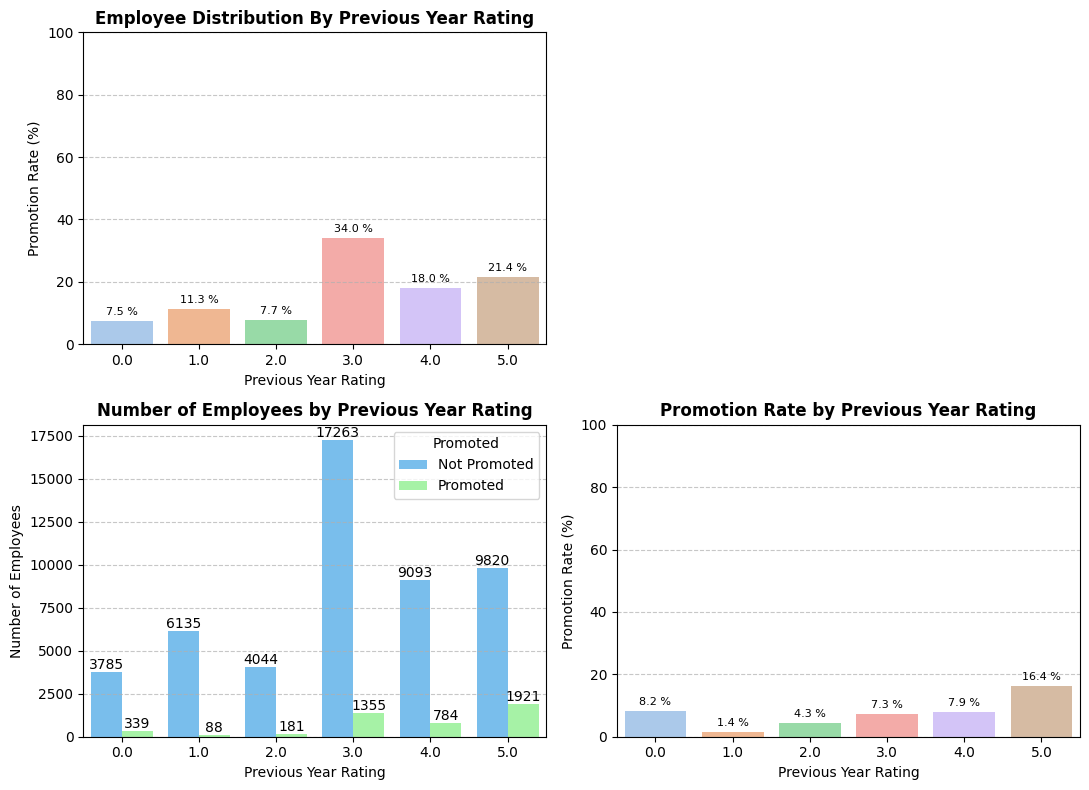

In [375]:
plt.figure(figsize=(11,8))

# Chart Employees Distribution By Previous Year Rating 
plt.subplot(2,2,1)

ax = sns.barplot(data=pyr_summary, x='previous_year_rating', y='Total_Employee_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Employee Distribution By Previous Year Rating", fontsize=12, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Previous Year Rating")
# plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Chart Number of Employees by Previous Year Rating
plt.subplot(2,2,3)

bars = sns.countplot(data=df, x='previous_year_rating', hue='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees by Previous Year Rating", fontsize=12, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Previous Year Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)
    
# Chart Promotion Rate by Previous Year Rating
plt.subplot(2,2,4)
ax = sns.barplot(data=pyr_summary, x='previous_year_rating', y='Promotion_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Promotion Rate by Previous Year Rating", fontsize=12, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Previous Year Rating")
# plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Employees with a previous year rating of **5.0** have the highest promotion rate at **16.4%**, followed by those rated **4.0** (**7.9%**) and **3.0** (**7.3%**). In contrast, employees with a rating of **1.0** have the lowest promotion rate at only **1.4%**, while those with a **2.0** rating also experience a relatively low rate of **4.3%**.

Interestingly, employees with a **0.0 rating**—who are identified as **new hires with less than one year of service**—have a promotion rate of **8.2%**, which is slightly higher than that of employees with ratings **3.0** or **4.0**. This suggests that **some new employees may be fast-tracked for promotion**, possibly due to prior experience, exceptional performance, or filling urgent organizational needs. However, it’s also possible that some of these promotions are tied to role reclassifications or probation-based evaluations rather than traditional performance reviews.

Overall, the data reinforces that **previous year performance rating is a strong predictor of promotion**, with promotion rates increasing along with higher ratings. However, **new employees (rating 0.0) receiving relatively high promotion rates raises important questions** about onboarding strategies, initial role assignments, or early career development paths within the organization.

### **KPI > 80% (kpis_met_over_80)**

In [376]:
# Grouping data by KPI >80% and Promotion
kpi_summary = df.groupby(['kpis_met_over_80', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
kpi_summary.columns = ['kpis_met_over_80', 'Not_Promoted', 'Promoted']

# Added total employee column for each KPI >80% category
kpi_summary['Total_Employee'] = kpi_summary['Promoted'] + kpi_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
kpi_summary['Promotion_Rate (%)'] = (kpi_summary['Promoted'] / kpi_summary['Total_Employee'] * 100).round(2)

# Sort data by % promotion from highest to lowest
kpi_summary = kpi_summary.sort_values(by='Promotion_Rate (%)', ascending=False)

# Displays the analysis results table
kpi_summary

,kpis_met_over_80,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%)
1,1,16029,3262,19291,16.91
0,0,34111,1406,35517,3.96


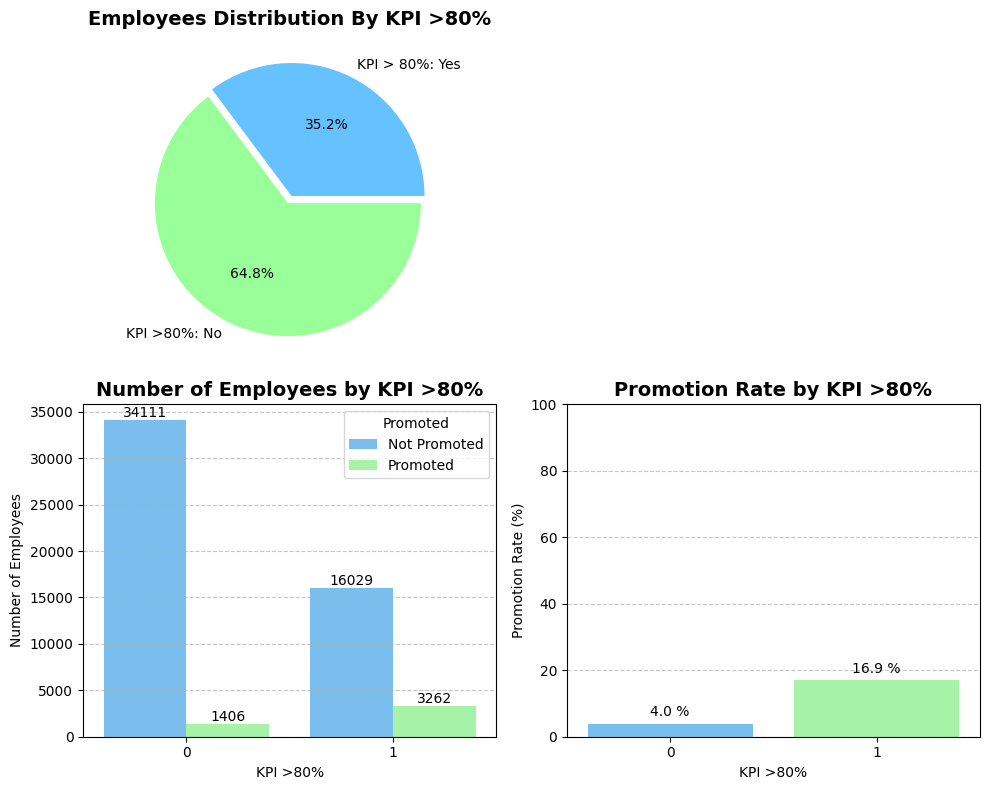

In [377]:
plt.figure(figsize=(10,8))

# Chart Employees Distribution By KPI >80% 
plt.subplot(2,2,1)

# Total Employees By KPI >80% 
total_emp = kpi_summary['Total_Employee']

# Piechart
plt.pie(total_emp, labels=['KPI > 80%: Yes', 'KPI >80%: No'], autopct='%1.1f%%',
        colors= ['#66c2ff', '#99ff99'],explode=[0.03] * len(total_emp))  

# Titles and labels
plt.title('Employees Distribution By KPI >80%', fontsize=14, fontweight='bold')

# Chart Number of Employees by KPI >80%
plt.subplot(2,2,3)
bars = sns.countplot(data=df, x='kpis_met_over_80', hue='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees by KPI >80%", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("KPI >80%")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)
    
# Chart Promotion Rate by KPI >80%
plt.subplot(2,2,4)
ax = sns.barplot(data=kpi_summary, x='kpis_met_over_80', y='Promotion_Rate (%)', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Promotion Rate by KPI >80%", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("KPI >80%")
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Employees with **KPI >80%** have a promotion rate of **16.9%**, which is significantly higher than the **4.0%** promotion rate among employees with **KPI ≤80%**. This substantial difference of **12.9%** suggests that **KPI performance is a strong influencing factor in promotion decisions**. In other words, employees who exceed 80% in their KPI performance are over **4 times more likely to be promoted** than those who do not meet that threshold.

However, it’s important to note that **only 35.2% of employees fall into the KPI >80% category**, meaning the majority of the workforce (64.8%) still operates below this benchmark. Despite their smaller proportion, the higher performance group contributes significantly to the total number of promotion **over 69% of promotions** come from this segment. This highlights that **promotion opportunities are more readily available to high-performing individuals**, reinforcing a performance-driven culture within the organization.

### **Award Won**

In [378]:
# Grouping data by Awards Won and Promotion
award_summary = df.groupby(['award_won', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
award_summary.columns = ['award_won', 'Not_Promoted', 'Promoted']

# Added total employee column for each Awards Won category
award_summary['Total_Employee'] = award_summary['Promoted'] + award_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
award_summary['Promotion_Rate (%)'] = (award_summary['Promoted'] / award_summary['Total_Employee'] * 100).round(2)

# Sort data by % promotion from highest to lowest
award_summary = award_summary.sort_values(by='Promotion_Rate (%)', ascending=False)

# Displays the analysis results table
award_summary

,award_won,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%)
1,1,711,559,1270,44.02
0,0,49429,4109,53538,7.67


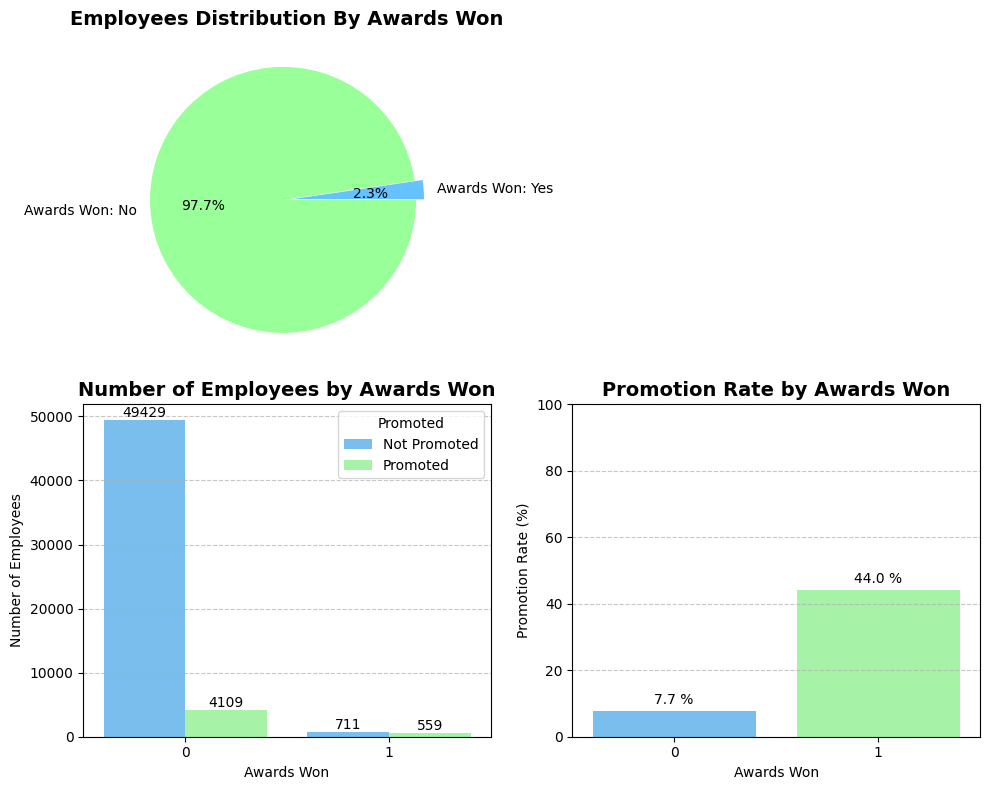

In [379]:
plt.figure(figsize=(10,8))

# Chart Employees Distribution By Awards Won 
plt.subplot(2,2,1)

# Total Employees By Awards Won 
total_emp = award_summary['Total_Employee']

# Piechart
plt.pie(total_emp, labels=['Awards Won: Yes', 'Awards Won: No'], autopct='%1.1f%%',
        colors= ['#66c2ff', '#99ff99'],explode=[0.03] * len(total_emp))  

# Titles and labels
plt.title('Employees Distribution By Awards Won', fontsize=14, fontweight='bold')

# Chart Number of Employees by Awards Won
plt.subplot(2,2,3)
bars = sns.countplot(data=df, x='award_won', hue='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees by Awards Won", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Awards Won")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)
    
# Chart Promotion Rate by Awards Won
plt.subplot(2,2,4)
ax = sns.barplot(data=award_summary, x='award_won', y='Promotion_Rate (%)', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Promotion Rate by Awards Won", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Awards Won")
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Employees who have **won at least one award** have a promotion rate of **44.0%**, significantly higher than the **7.7%** promotion rate of those who have **not won any awards**. This **36.3% gap** indicates that **receiving an award is strongly associated with a higher likelihood of promotion**. 

This suggests that the organization **recognizes and rewards high-performing individuals**, and awards could serve as an important signal for identifying talent ready for advancement. However, it's important to highlight that **only 2.3% of employees have received awards**, meaning **the majority of promotions still come from the larger non-awarded group** simply due to size. 

In conclusion, while awards are rare, they appear to be a **high-impact factor** in promotion decisions, reflecting the organization's emphasis on performance excellence.

## **Employee Development Factors (Training)**

Training is part of career development. These factors will be used as analysis material to see **whether they are related to the promotion process** based on `Number of Trainings` and `Average Training Score`.

### **Number of Trainings**

In [380]:
# Grouping data by Number of Trainings and Promotion
not_summary = df.groupby(['no_of_trainings', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
not_summary.columns = ['no_of_trainings', 'Not_Promoted', 'Promoted']

# Added total employee column for each Number of Trainings category
not_summary['Total_Employee'] = not_summary['Promoted'] + not_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
not_summary['Promotion_Rate (%)'] = (not_summary['Promoted'] / not_summary['Total_Employee'] * 100).round(2)

# Sort data by % promotion from highest to lowest
not_summary = not_summary.sort_values(by='Promotion_Rate (%)', ascending=False)

# Calculates the Total Employee percentage (% promotion) and rounds to 2 decimal places.
not_summary['Total_Employee_Rate (%)'] = (not_summary['Total_Employee'] / not_summary['Total_Employee'].sum() * 100).round(2)

# Displays the analysis results table
not_summary

,no_of_trainings,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%),Total_Employee_Rate (%)
0,1,40468,3910,44378,8.81,80.97
1,2,7382,605,7987,7.57,14.57
2,3,1654,122,1776,6.87,3.24
3,4,442,26,468,5.56,0.85
5,6,42,2,44,4.55,0.08
4,5,125,3,128,2.34,0.23
6,7,12,0,12,0.00,0.02
7,8,5,0,5,0.00,0.01
8,9,5,0,5,0.00,0.01
9,10,5,0,5,0.00,0.01


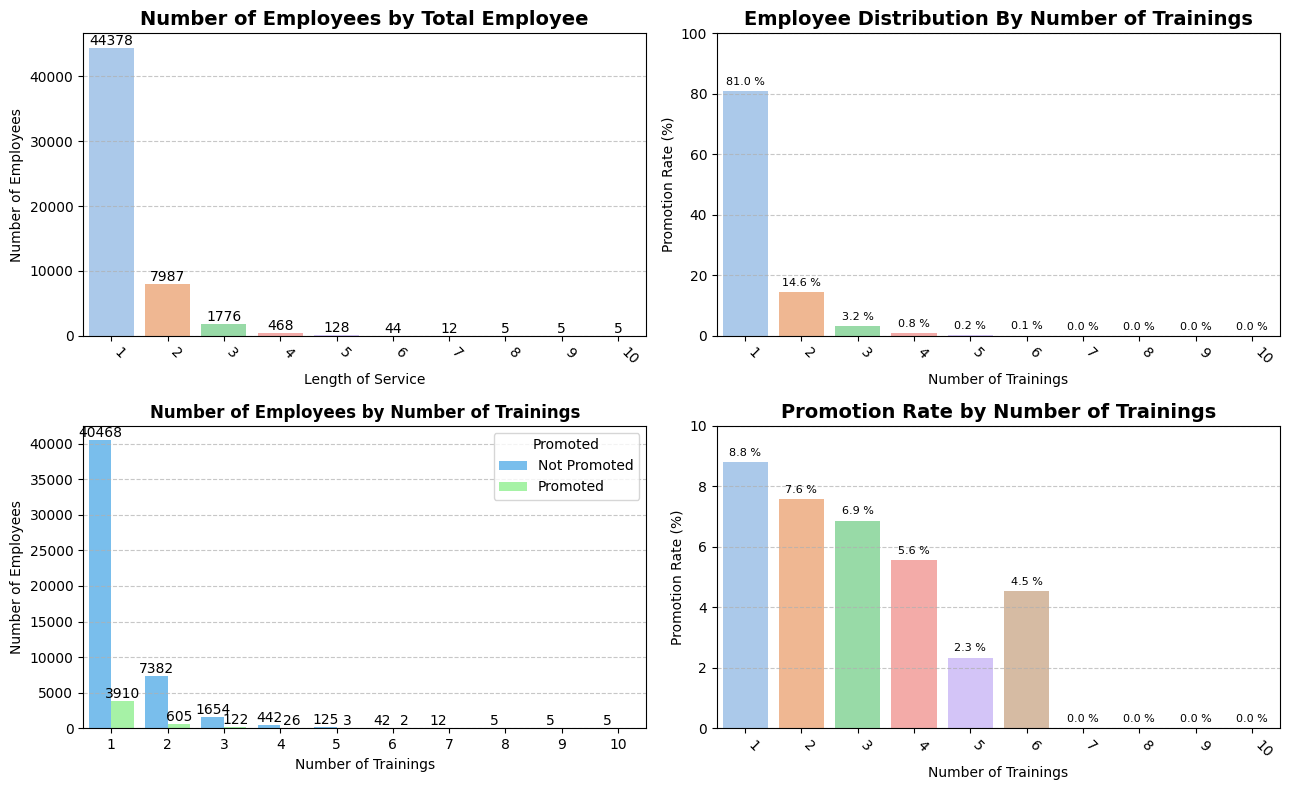

In [381]:
plt.figure(figsize=(13,8))

# Chart Employees Distribution By Total Employee  
plt.subplot(2,2,1)
bars = sns.countplot(df, x='no_of_trainings', palette='pastel')

# Titles and labels
plt.title("Number of Employees by Total Employee", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Length of Service")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)

# Chart Employees Distribution By Number of Trainings 
plt.subplot(2,2,2)

ax = sns.barplot(data=not_summary, x='no_of_trainings', y='Total_Employee_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Employee Distribution By Number of Trainings", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Number of Trainings")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Chart Number of Employees by Number of Trainings
plt.subplot(2,2,3)

bars = sns.countplot(data=df, x='no_of_trainings', hue='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees by Number of Trainings", fontsize=12, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Number of Trainings")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)
    
# Chart Promotion Rate by Number of Trainings
plt.subplot(2,2,4)
ax = sns.barplot(data=not_summary, x='no_of_trainings', y='Promotion_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Promotion Rate by Number of Trainings", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Number of Trainings")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Employees who have attended only **1 training** have the highest promotion rate at **8.8%**, followed by those who attended **2 trainings (7.6%)** and **3 trainings (6.9%)**. Interestingly, the promotion rate **declines steadily** as the number of trainings increases beyond that point, dropping to **0%** for those who attended **7 or more trainings**. This counterintuitive trend suggests that **a higher number of trainings does not necessarily correlate with a higher chance of promotion**.

Additionally, it’s important to note that the workforce is heavily concentrated among those who have attended just **1 training (81.0%)**, with the proportion of employees rapidly decreasing as training count increases. Despite the declining promotion rate with more trainings, the **majority of promotions still come from the lower training count groups**, simply because they make up the bulk of the employee base.

This implies that **training participation alone may not be a strong driver for promotion**, and that other factors such as KPI could play a more critical role in determining promotion opportunities.

### **Average Training Score**

In [382]:
# Duplicate df
df_dupe = df

# Menerapkan Custom Binning untuk no_of_trainings
bins = [0, 51, 61, 71, 81, 91, float("inf")]  # Batas kategori
labels = ["0-50", "51-60", "61-70", '71-80', '81-90', '91-100']

df_dupe['avg_training_score'] = pd.cut(df_dupe["avg_training_score"], bins=bins, labels=labels, right=True)

# Menampilkan jumlah data dalam setiap kategori
df_dupe["avg_training_score"].value_counts()

avg_training_score
51-60     15552
0-50      14350
61-70      8992
71-80      7953
81-90      7499
91-100      462
Name: count, dtype: int64

In [383]:
# # Duplicate df
# df_dupe = df

# Grouping data by Average Training Score and Promotion
ats_summary = df_dupe.groupby(['avg_training_score', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
ats_summary.columns = ['avg_training_score', 'Not_Promoted', 'Promoted']

# Added total employee column for each Average Training Score category
ats_summary['Total_Employee'] = ats_summary['Promoted'] + ats_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
ats_summary['Promotion_Rate (%)'] = (ats_summary['Promoted'] / ats_summary['Total_Employee'] * 100).round(2)

# Calculates the Total Employee percentage (% promotion) and rounds to 2 decimal places.
ats_summary['Total_Employee_Rate (%)'] = (ats_summary['Total_Employee'] / ats_summary['Total_Employee'].sum() * 100).round(2)

# Displays the analysis results table
ats_summary

,avg_training_score,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%),Total_Employee_Rate (%)
0,0-50,13773,577,14350,4.02,26.18
1,51-60,14630,922,15552,5.93,28.38
2,61-70,8104,888,8992,9.88,16.41
3,71-80,7132,821,7953,10.32,14.51
4,81-90,6471,1028,7499,13.71,13.68
5,91-100,30,432,462,93.51,0.84


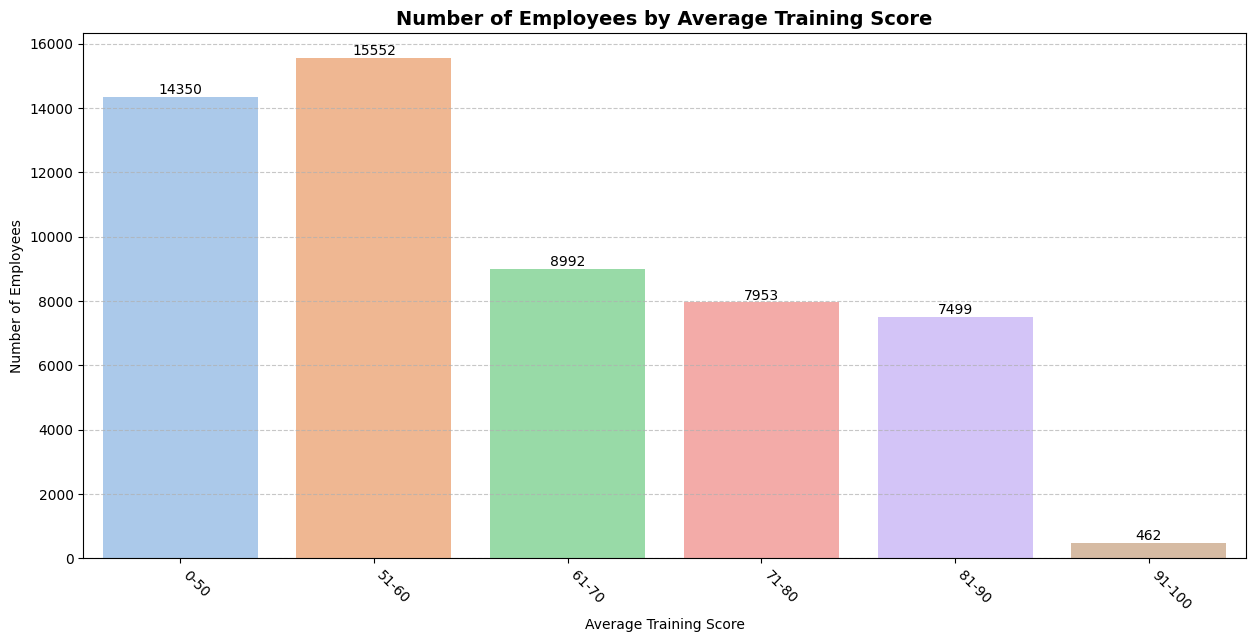

In [384]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
bars = sns.countplot(df_dupe, x='avg_training_score', palette='pastel')

# Titles and labels
plt.title("Number of Employees by Average Training Score", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Average Training Score")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)

The majority of employees have average training scores clustered around **50 to 60**, with the peak number of employees scoring **49 (2,716 employees)** and **48 (2,687 employees)**. This suggests that **most employees tend to perform at a moderate level in training assessments**. Very few employees score below **40** or above **90**, indicating that **extremely low or high scores are rare** within the organization.

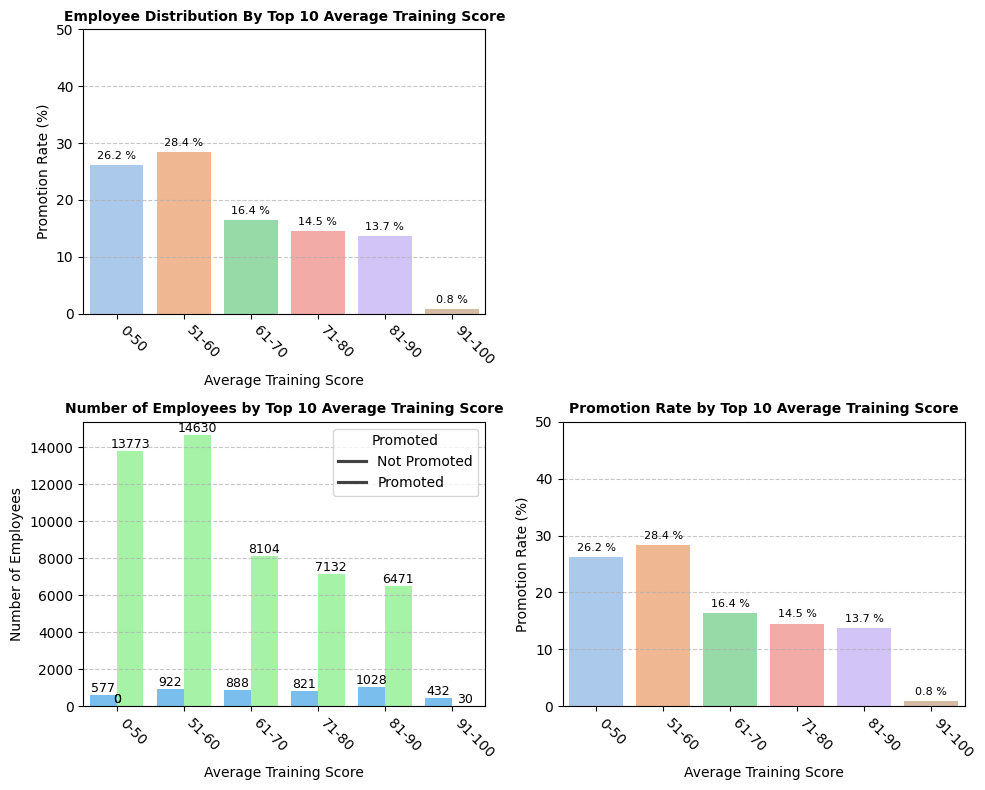

In [385]:
plt.figure(figsize=(10,8))

# Chart Employees Distribution By Average Training Score 
plt.subplot(2,2,1)

ax = sns.barplot(data=ats_summary, x='avg_training_score', y='Total_Employee_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Employee Distribution By Top 10 Average Training Score", fontsize=10, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Average Training Score")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 50)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Chart Number of Employees by Average Training Score
plt.subplot(2,2,3)

# Melt data to long format for countplot
los_melted = ats_summary.melt(
    id_vars='avg_training_score', 
    value_vars=['Promoted', 'Not_Promoted'], 
    var_name='Promotion_Status', 
    value_name='Count'
)

# Set up the plot
ax = sns.barplot(data=los_melted, x='avg_training_score', y='Count', hue='Promotion_Status', palette=['#66c2ff', '#99ff99'])
# Titles and labels
plt.title("Number of Employees by Top 10 Average Training Score", fontsize=10, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Average Training Score")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)
    
# Chart Promotion Rate by Average Training Score
plt.subplot(2,2,4)
ax = sns.barplot(data=ats_summary, x='avg_training_score', y='Total_Employee_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Promotion Rate by Top 10 Average Training Score", fontsize=10, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Average Training Score")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 50)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Employees with an average training score between **51–60** have the **highest promotion rate at 28.4%**, followed by those scoring **0–50** at **26.2%**. Interestingly, as the average training score increases beyond 60, the promotion rate declines significantly—employees scoring **61–70** have a promotion rate of **16.4%**, and this trend continues downward to just **0.8%** for those scoring **91–100**. 

This pattern suggests that **higher training scores do not necessarily translate into higher promotion opportunities**. In fact, employees with lower to mid-range training scores are promoted more frequently. This could indicate that **promotion decisions are not influenced by factors training performance**.

It’s also worth noting that the largest group of employees fall within the **51–60** and **0–50** score ranges, which aligns with the higher number of promotions in those bands. Thus, while strong training scores may reflect learning engagement, **they are not the main determinant of promotion** in this company.

## **Organizational Factors (Structure & Placement)**

This factor relates to how and where an employee is **positioned in the organizational structure**. These factors will be used as analysis material to see **whether they are related to the promotion process** based on `Department`, `Recruitment Channel`, and `Length of Service`.

### **Department**

In [386]:
# Grouping data by Department and Promotion
dept_summary = df.groupby(['department', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
dept_summary.columns = ['department', 'Not_Promoted', 'Promoted']

# Added total employee column for each Department category
dept_summary['Total_Employee'] = dept_summary['Promoted'] + dept_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
dept_summary['Promotion_Rate (%)'] = (dept_summary['Promoted'] / dept_summary['Total_Employee'] * 100).round(2)
# dept_summary['Promotion_Rate (%)'] = (dept_summary['Promoted'] / df['department'].count() * 100).round(2)

# Sort data by % promotion from highest to lowest
dept_summary = dept_summary.sort_values(by='Promotion_Rate (%)', ascending=False)

# Calculates the Total Employee percentage (% promotion) and rounds to 2 decimal places.
dept_summary['Total_Employee_Rate (%)'] = (dept_summary['Total_Employee'] / dept_summary['Total_Employee'].sum() * 100).round(2)

# Displays the analysis results table
dept_summary

,department,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%),Total_Employee_Rate (%)
8,Technology,6370,768,7138,10.76,13.02
5,Procurement,6450,688,7138,9.64,13.02
0,Analytics,4840,512,5352,9.57,9.76
4,Operations,10325,1023,11348,9.01,20.71
1,Finance,2330,206,2536,8.12,4.63
7,Sales & Marketing,15627,1213,16840,7.20,30.73
6,R&D,930,69,999,6.91,1.82
2,HR,2282,136,2418,5.62,4.41
3,Legal,986,53,1039,5.10,1.90


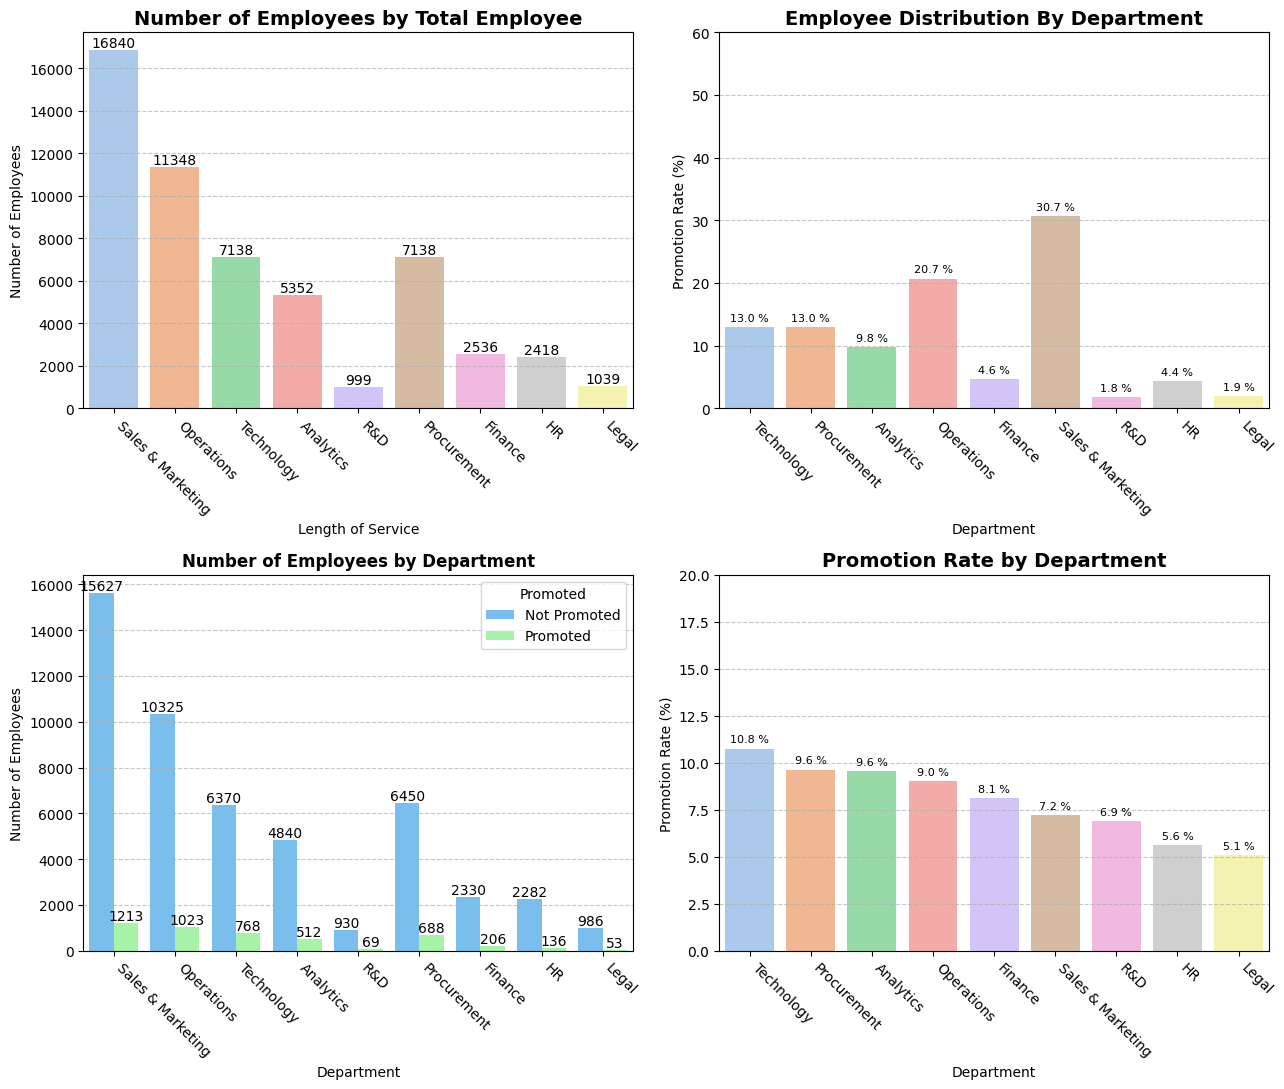

In [387]:
plt.figure(figsize=(13,11))

# Chart Employees Distribution By Total Employee  
plt.subplot(2,2,1)
bars = sns.countplot(df, x='department', palette='pastel')

# Titles and labels
plt.title("Number of Employees by Total Employee", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Length of Service")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)

# Chart Employees Distribution By Department 
plt.subplot(2,2,2)

ax = sns.barplot(data=dept_summary, x='department', y='Total_Employee_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Employee Distribution By Department", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Department")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 60)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Chart Number of Employees by Department
plt.subplot(2,2,3)

bars = sns.countplot(data=df, x='department', hue='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees by Department", fontsize=12, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Department")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)
    
# Chart Promotion Rate by Department
plt.subplot(2,2,4)
ax = sns.barplot(data=dept_summary, x='department', y='Promotion_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Promotion Rate by Department", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Department")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 20)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Employees in the **Technology department** have the highest promotion rate at **10.8%**, followed by **Procurement** and **Analytics** departments with **9.6%** each. On the other hand, departments such as **HR (5.6%)**, **Sales & Marketing (7.2%)**, and **Legal (5.1%)** have relatively lower promotion rates. The difference between the highest and lowest promotion rates across departments is about **5.7%**, indicating that **department affiliation can influence the likelihood of being promoted**.

Interestingly, while **Sales & Marketing** is the **largest department (31.6% of total employees)**, its promotion rate is **below average**, which results in a large number of **non-promoted employees** despite its workforce size. In contrast, departments like **Technology and Procurement**, though smaller in size, show relatively **higher promotion efficiency**, suggesting that **departmental roles and functions may impact promotion decisions more than sheer employee volume**.

This highlights a possible imbalance where **larger departments are not necessarily associated with higher promotion opportunities**, and **employees in certain departments may face more or less favorable promotion conditions depending on internal priorities or performance metrics**.

### **Recruitment Channel**

In [388]:
# Grouping data by Recruitment Channel and Promotion
rc_summary = df.groupby(['recruitment_channel', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
rc_summary.columns = ['recruitment_channel', 'Not_Promoted', 'Promoted']

# Added total employee column for each Recruitment Channel category
rc_summary['Total_Employee'] = rc_summary['Promoted'] + rc_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
rc_summary['Promotion_Rate (%)'] = (rc_summary['Promoted'] / rc_summary['Total_Employee'] * 100).round(2)

# Sort data by % promotion from highest to lowest
rc_summary = rc_summary.sort_values(by='Promotion_Rate (%)', ascending=False)

# Displays the analysis results table
rc_summary

,recruitment_channel,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%)
1,referred,1004,138,1142,12.08
2,sourcing,21246,1974,23220,8.50
0,other,27890,2556,30446,8.40


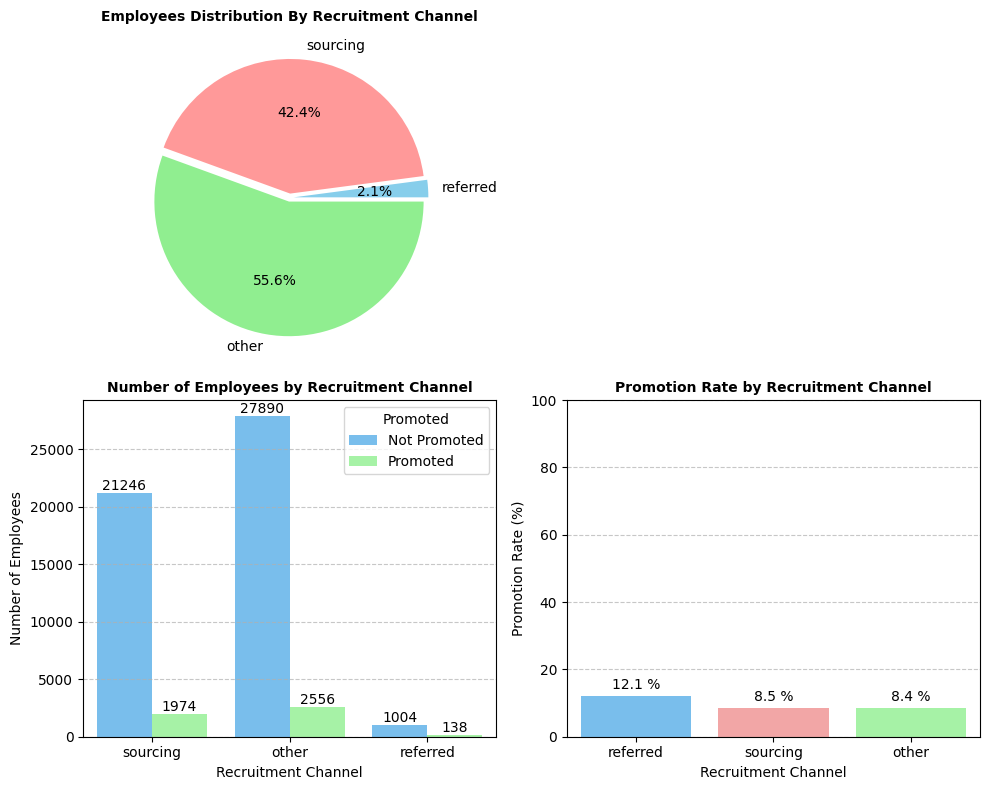

In [389]:
plt.figure(figsize=(10,8))

# Chart Employees Distribution By Recruitment Channel 
plt.subplot(2,2,1)

# Total Employees By Recruitment Channel 
total_emp = rc_summary['Total_Employee']

# Piechart
plt.pie(total_emp, labels=rc_summary['recruitment_channel'].values, autopct='%1.1f%%',
        colors= ['skyblue', '#ff9999', 'lightgreen'],explode=[0.03] * len(total_emp))  

# Titles and labels
plt.title('Employees Distribution By Recruitment Channel', fontsize=10, fontweight='bold')

# Chart Number of Employees by Recruitment Channel
plt.subplot(2,2,3)
bars = sns.countplot(data=df, x='recruitment_channel', hue='is_promoted', palette=['#66c2ff', '#99ff99'])

# Titles and labels
plt.title("Number of Employees by Recruitment Channel", fontsize=10, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Recruitment Channel")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)
    
# Chart Promotion Rate by Recruitment Channel
plt.subplot(2,2,4)
ax = sns.barplot(data=rc_summary, x='recruitment_channel', y='Promotion_Rate (%)', palette=['#66c2ff', '#ff9999', '#99ff99'])

# Titles and labels
plt.title("Promotion Rate by Recruitment Channel", fontsize=10, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Recruitment Channel")
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Employees recruited through **referrals have the highest promotion rate at 12.1%**, compared to those recruited through **sourcing (8.5%)** and **other channels (8.4%)**. The difference in promotion rate between referred employees and those from other channels is about **3.6%**, suggesting that **recruitment channel may have a moderate influence on promotion opportunities**.

However, it's important to note that **referred employees make up only 2.1% of the workforce**, while **sourcing and other channels account for 42.4% and 55.6% respectively**. This means that, despite having the highest promotion rate, the **absolute number of promoted referred employees remains relatively low** due to their small representation in the overall employee population.

This implies that **referral-based hiring may be more selective or targeted, resulting in higher promotion rates**, but it does not significantly impact the overall promotion numbers due to its limited use.

### **Length of Service**

In [390]:
# Grouping data by Length of Service and Promotion
los_summary = df.groupby(['length_of_service', 'is_promoted']).size().unstack(fill_value=0).reset_index()

# Changing column names to make them easier to understand
los_summary.columns = ['length_of_service', 'Not_Promoted', 'Promoted']

# Added total employee column for each Length of Service category
los_summary['Total_Employee'] = los_summary['Promoted'] + los_summary['Not_Promoted']

# Calculates the promotion percentage (% promotion) and rounds to 2 decimal places.
los_summary['Promotion_Rate (%)'] = (los_summary['Promoted'] / los_summary['Total_Employee'] * 100).round(2)

# Sort data by % promotion from highest to lowest
los_summary = los_summary.sort_values(by='Promotion_Rate (%)', ascending=False).head(10)

# Calculates the Total Employee percentage (% promotion) and rounds to 2 decimal places.
los_summary['Total_Employee_Rate (%)'] = (los_summary['Total_Employee'] / los_summary['Total_Employee'].sum() * 100).round(2)

# Displays the analysis results table
los_summary

,length_of_service,Not_Promoted,Promoted,Total_Employee,Promotion_Rate (%),Total_Employee_Rate (%)
33,34,3,1,4,25.00,0.03
31,32,8,2,10,20.00,0.08
22,23,58,7,65,10.77,0.49
10,11,820,96,916,10.48,6.95
28,29,27,3,30,10.00,0.23
21,22,55,6,61,9.84,0.46
18,19,297,32,329,9.73,2.50
7,8,2614,269,2883,9.33,21.88
9,10,1989,204,2193,9.30,16.65
1,2,6089,595,6684,8.90,50.73


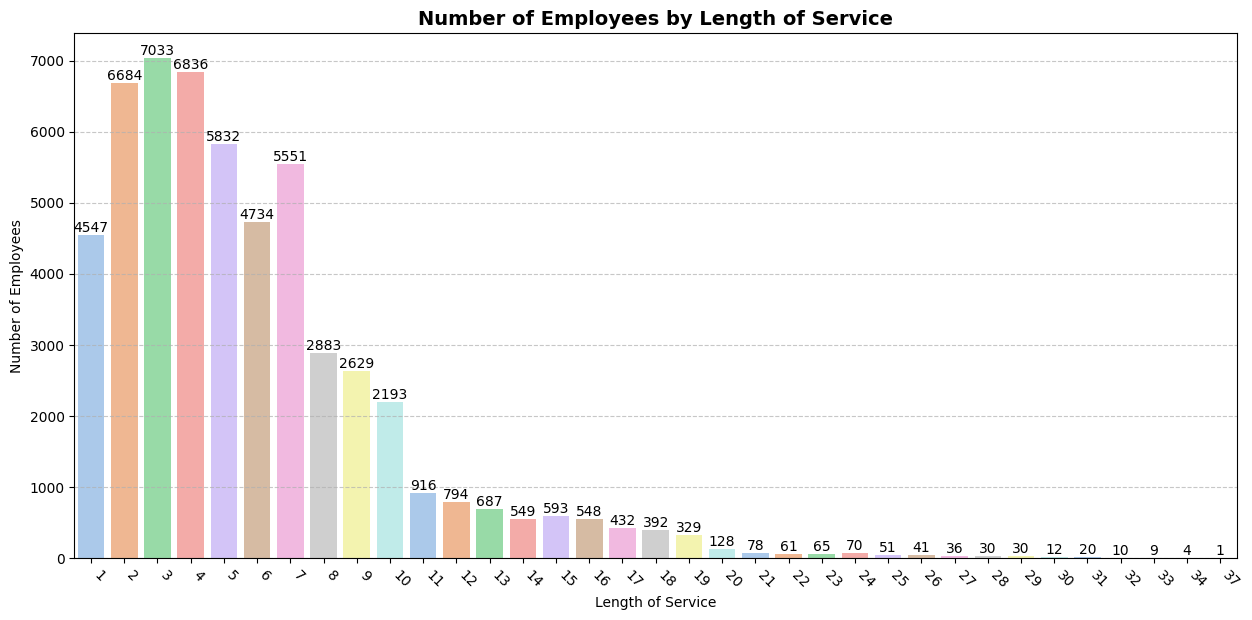

In [391]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
bars = sns.countplot(df, x='length_of_service', palette='pastel')

# Titles and labels
plt.title("Number of Employees by Length of Service", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Length of Service")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (Number of Employees)
for container in bars.containers:
        bars.bar_label(container)

Employees with **1–5 years of service** make up the majority of the workforce, with each year group contributing over **4,500 to 7,000 employees**. Specifically, employees with **3 and 4 years of service** represent the largest cohorts, at **7,033** and **6,836** employees respectively. This indicates a relatively young workforce, with a significant proportion still in the early stages of their tenure.

Conversely, the number of employees drops sharply after the **5-year mark**, with a more gradual decline observed from year **6 onward**. By the time employees reach **10 years of service**, the numbers have decreased to under **1,000**, and by **20 years or more**, the numbers drop below **100 employees** per year of service.

This distribution suggests that **employee turnover is relatively high after 5 years**, and **very few employees stay beyond 15–20 years**. It also reinforces the earlier observation regarding promotion for new employees (previous year rating 0.0), since the company has a **large influx of relatively new hires** who make up a significant portion of the workforce. This trend may reflect either **a strategy to bring in fresh talent regularly**, or **a challenge in retaining employees long-term**, which warrants further exploration.

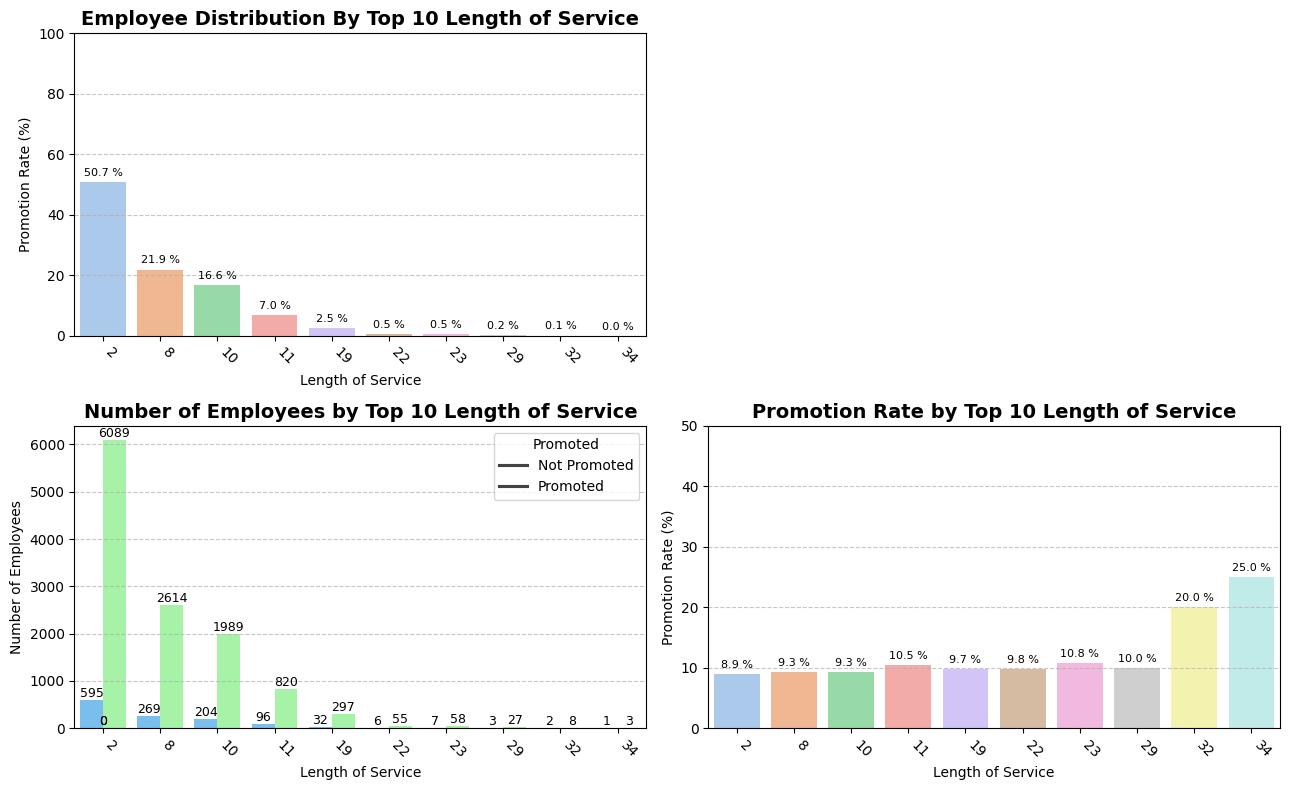

In [392]:
plt.figure(figsize=(13,8))

# Chart Employees Distribution By Length of Service 
plt.subplot(2,2,1)

ax = sns.barplot(data=los_summary, x='length_of_service', y='Total_Employee_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Employee Distribution By Top 10 Length of Service", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Length of Service")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Chart Number of Employees by Length of Service
plt.subplot(2,2,3)

# Melt data to long format for countplot
los_melted = los_summary.melt(
    id_vars='length_of_service', 
    value_vars=['Promoted', 'Not_Promoted'], 
    var_name='Promotion_Status', 
    value_name='Count'
)

# Set up the plot
ax = sns.barplot(data=los_melted, x='length_of_service', y='Count', hue='Promotion_Status', palette=['#66c2ff', '#99ff99'])
# Titles and labels
plt.title("Number of Employees by Top 10 Length of Service", fontsize=14, fontweight='bold')
plt.ylabel("Number of Employees")
plt.xlabel("Length of Service")
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])

# Add annotate (Number of Employees)
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)
    
# Chart Promotion Rate by Length of Service
plt.subplot(2,2,4)

ax = sns.barplot(data=los_summary, x='length_of_service', y='Promotion_Rate (%)', palette='pastel')

# Titles and labels
plt.title("Promotion Rate by Top 10 Length of Service", fontsize=14, fontweight='bold')
plt.ylabel("Promotion Rate (%)")
plt.xlabel("Length of Service")
plt.xticks(rotation=-45, ha='left')
plt.ylim(0, 50)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotate (percentage labels)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

Employees with **2 years of service** have the highest promotion rate at **8.9%**, and they also represent the largest portion of promoted individuals **50.7%** of all promotions come from this group. This is likely due to their **large workforce presence (6,684 employees)** and the fact that many have recently become eligible for promotion after completing their first full year.

Interestingly, while employees with **longer tenures (e.g., 32 and 34 years)** have **higher individual promotion rates (20.0% and 25.0%)**, their absolute contribution to total promotions is minimal due to their **very small numbers in the workforce**. For example, there are only **10 employees with 32 years of service** and **4 with 34 years**, out of which **2 and 1 were promoted**, respectively.

This suggests that while **employees with longer tenure may be more likely to get promoted on an individual level**, the overall promotion landscape is heavily shaped by the **large volume of early-tenure employees**, particularly those with **2–3 years of service**. Therefore, **length of service beyond a certain point (e.g., >10 years)** doesn't strongly influence promotion chances in aggregate, given the declining number of such employees in the company.

## **Conclusion For Analysis**

1. **Demographics:** Younger to mid-career employees, particularly those aged **30–34**, are more likely to be promoted, although **age alone is not a strong predictor** once other factors are considered. **Gender does not significantly impact promotion outcomes**, as male and female employees are promoted at similar rates despite differences in workforce composition. **Educational background also shows minimal influence**, with promotion rates differing by less than 1% across education levels, suggesting that **workforce distribution plays a larger role** in promotion numbers. In contrast, **regional disparities are more pronounced**, indicating that **promotion outcomes are influenced by regional practices**, and **policy standardization may be needed to ensure equitable advancement opportunities across locations**.

2. **Employee Performance:** Employees with higher **Previous year ratings**, **KPI scores above 80%**, and those who have **won awards** are significantly more likely to be promoted, indicating a **strong performance-driven promotion culture** within the organization. While awards are rare, they are highly impactful, and exceeding KPI benchmarks or receiving top performance ratings consistently correlates with a higher chance of advancement. This highlights that **recognition and measurable achievements are key levers for career progression**, with the organization placing clear emphasis on rewarding excellence and high individual contributions.

3. **Employee Development (Training):** Employees who attend **fewer training sessions** and those with **lower to mid-range training scores** tend to have **higher promotion rates**, suggesting that **training volume and performance are not strong predictors of promotion**. In fact, excessive training or very high training scores may not directly correlate with advancement, indicating that **other performance-related factors may carry more weight** in promotion decisions. This implies that while training may support skill development, it is **not the primary driver of career progression** within the organization.

4. **Organizational:** Employees in certain departments such as **Technology, Procurement, and Analytics** are more likely to be promoted, suggesting that **departmental function plays a role in career advancement**, while larger departments like **Sales & Marketing** may offer fewer opportunities despite their size. Similarly, employees hired through **referral channels show higher promotion rates**, indicating that **recruitment method may impact advancement potential**, although the effect is limited by the small number of referred hires. Additionally, **length of service influences promotion rates most notably at the 2-year mark**, where eligibility and workforce volume align, while **longer tenure shows higher individual promotion likelihood but limited overall impact** due to small employee counts in those segments.

## **Recommendations For Analysis**

1. **Standardize Promotion Policies Across Regions**  
   - Review and align promotion criteria in all regions to **ensure fairness and consistency** in career advancement opportunities.
2. **Reinforce Performance-Based Promotion Culture**  
   - Strengthen performance evaluation systems by **tying promotions more directly to KPI achievements and award recognition**.
3. **Optimize Training Programs for Practical Impact**  
   - Focus on **targeted, role-specific training** rather than training volume, and regularly assess how training translates to on-the-job performance.
4. **Review Career Growth in Large Departments**  
   - Conduct internal audits in departments like **Sales & Marketing** to identify and **remove bottlenecks** in promotion pathways.
5. **Expand Use of Referral Recruitment Channels**  
   - Encourage internal referrals by **incentivizing employees**, given that referred hires show higher promotion rates and potential.
6. **Leverage Early Tenure Milestones (2-Year Mark)**  
   - Build structured **promotion-readiness programs** for employees approaching the 2-year mark to support timely career progression.


# **Methodology (Machine Learning)**

## **Resampling**

The intended distribution of this dataset is unbalanced (imbalanced data), meaning that there are significantly fewer promoted employees than unpromoted employees.  Because of this imbalance, the model may forecast the majority class while ignoring the minority.  The class distribution is balanced through the use of the resampling technique. 

Resampling is a data-level technique used to address class imbalance. It involves either adding duplicate data or samples from the majority class to the minority class so that the ratio is equal (oversampling) or removing samples from the majority class so that the ratio is equal (undersampling). 

Beberapa metode yang akan kita gunakan adalah sebagai berikut:
| Resampler | Definition |
| --- | --- |
| RandomOverSampler | RandomOverSampler is an over-sampling technique that balances classes by duplicating random samples from the minority class. The way it works is to randomly select samples from the minority class, then make copies of them until the number is equa to the majority class. |
| RandomUnderSampler | RandoRandomUnderSampler is an under-sampling technique that balances classes by removing random samples from the majority class. The way it works is to randomly reduce the number of majority samples until they are balanced with the minority. |
| SMOTE | SMOTE (Synthetic Minority Over-sampling Technique) is an over-sampling technique that creates synthetic samples for the minority class using linear interpolation between nearby points. The way it works is to select two adjacent minority samples, then generate a new point between them. |
| NearMiss | NearMiss is a selective under-sampling technique that retains the majority sample closest to the minority class. The way it works is Selecting the majority sample with the smallest average distance to k minority samples.  |

In [393]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss

ros = RandomOverSampler(random_state = 42)
rus = RandomUnderSampler(random_state = 42)
smote = SMOTE(random_state = 42)
nearmiss = NearMiss()

## **Cross Validation**

One technique in machine learning for assessing a model's ability to function objectively is cross validation.  Cross validation is used to get a more reliable estimate of how well the model will perform on data it has never seen before and to prevent overfitting, which occurs when the model fits the training data too well but does not generalize well to new data.

Some of the models that we will evaluate to find the main model are:

| NO | Model | Descrition |
| --- | --- | --- |
| 1. | Logistic Regression | Logistic regression is a data analysis technique that uses mathematics to find the relationship between two data factors. Then it uses this relationship to predict the value of one of the factors based on the other factor. Predictions usually have a limited number of outcomes, such as yes or no. |
| 2. | Decision Tree | Decision Tree is one of the Machine Learning algorithms that works by building a prediction model by dividing data into smaller subsets based on certain conditions. The structure of this model is tree-shaped, with a root node at the top, branches in the middle, and leaves at the bottom that represent the decision results (output). |
| 3. | KNearest Neighbors | KNearest Neighbors is one of the Machine Learning algorithms that utilizes nearby data to make predictions on new, unknown data (train data). This algorithm works by finding a number of nearest neighbors from the train data and determining the class of the train data based on the majority of classes of the nearest neighbors (train data) found. |
| 4. | XGBoost | Extreme Gradient Boosting is a Decision Tree-based Machine Learning algorithm designed to provide high performance and computational efficiency. This algorithm is one implementation of the gradient boosting technique, which combines many weak Decision Tree models (weak learners) iteratively to form a stronger model. |
| 5. | CatBoost | Light Gradient Boosting Machine is a gradient boosting-based Machine Learning algorithm designed for high efficiency and good performance, especially on large and high-dimensional datasets. LightGBM uses a leaf-wise growth method compared to level-wise as in XGBoost. |
| 6. | Random Forest | Random Forest is a Machine Learning algorithm that works by combining many decision trees to create a more robust, stable, and accurate model. Random Forest works based on the principle of bagging (bootstrap aggregating), where many decision tree models are trained independently, and the end result is an aggregation of all those trees. |

The parameters used by Cross_val_score are as follows:
| Parameter CV | Keterangan |
| --- | --- |
| cv = skfold | Stratified K-Fold Cross-Validation is an advanced form of cross-validation that is particularly useful when dealing with datasets that have an imbalanced class distribution. It is a technique that ensures that each fold of a dataset contains nearly the same percentage of samples from each class as the full set, making the training and validation process fair and more reliable.. |
| scoring = Recall | Reduce the number of FN at the risk of increasing FP |

In [394]:
# define algo
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
logreg = LogisticRegression(random_state=42)
xgboost = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
cb = CatBoostClassifier(random_seed=9, verbose=False)
rf = RandomForestClassifier(random_state=42)

list_algo = [tree, knn, logreg, xgboost, lgbm, cb, rf]
list_resampler = [None, ros, rus, smote, nearmiss]

list_algo_name = []
list_resampler_name = []
list_recall_all = []
list_mean_recall = []
list_std_recall = []

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for algo in list_algo:
    for resampler in list_resampler:
    # define algo
        model = algo

        Pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('resampler', resampler),
        ('modeling', model)
        ])

    #cross validation
        cv_score = cross_val_score(
            estimator = Pipe_model,   
            X = X_train,
            y = y_train,
            scoring = 'recall',
            cv = skfold
    )

    #scoring 
        list_algo_name.append(str(algo))  
        list_resampler_name.append(str(resampler)) 
        list_recall_all.append(cv_score.round(2).tolist())  
        list_mean_recall.append(cv_score.mean())   
        list_std_recall.append(cv_score.std()) 

[LightGBM] [Info] Number of positive: 2987, number of negative: 32089
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 35076, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085158 -> initscore=-2.374244
[LightGBM] [Info] Start training from score -2.374244
[LightGBM] [Info] Number of positive: 2987, number of negative: 32090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 35077, number of used features: 25
[LightGBM] [Info] [bin

In [395]:
df_cv = pd.DataFrame({
    "algo": list_algo_name,
    "resampler": list_resampler_name,
    "recall": list_recall_all,
    "recall_mean": list_mean_recall,
    "recall_std": list_std_recall
})
df_cv.sort_values(by='recall_mean', ascending=False)

,algo,resampler,recall,recall_mean,recall_std
22,LGBMClassifier(random_state=42),RandomUnderSampler(random_state=42),"[0.91, 0.9, 0.9, 0.91, 0.92]",0.909752,0.008829
27,<catboost.core.CatBoostClassifier object at 0x...,RandomUnderSampler(random_state=42),"[0.9, 0.9, 0.88, 0.9, 0.91]",0.897164,0.009829
21,LGBMClassifier(random_state=42),RandomOverSampler(random_state=42),"[0.87, 0.88, 0.87, 0.87, 0.9]",0.878956,0.012296
32,RandomForestClassifier(random_state=42),RandomUnderSampler(random_state=42),"[0.85, 0.86, 0.85, 0.85, 0.87]",0.855388,0.010412
17,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=42),"[0.85, 0.83, 0.84, 0.85, 0.86]",0.848959,0.010943
11,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),"[0.78, 0.78, 0.72, 0.81, 0.8]",0.778259,0.031835
12,LogisticRegression(random_state=42),RandomUnderSampler(random_state=42),"[0.77, 0.79, 0.72, 0.8, 0.8]",0.774243,0.030607
13,LogisticRegression(random_state=42),SMOTE(random_state=42),"[0.76, 0.8, 0.7, 0.8, 0.78]",0.768884,0.035694
2,DecisionTreeClassifier(random_state=42),RandomUnderSampler(random_state=42),"[0.73, 0.74, 0.75, 0.77, 0.79]",0.756034,0.020296
16,"XGBClassifier(base_score=None, booster=None, c...",RandomOverSampler(random_state=42),"[0.74, 0.76, 0.75, 0.75, 0.74]",0.746382,0.007603


# **Hyperparameter Tuning**

Di bawah ini adalah parameter yang akan digunakan untuk model Logistic Regression:

| No | Parameter | Deskripsi |
| --- | --- | --- |
| 1. | Penalty | Penalty adalah parameter yang menentukan jenis regularisasi yang diterapkan pada model Logistic Regression. Regularisasi membantu mencegah overfitting dengan menambahkan penalti pada bobot/koefisien model. Ada beberapa jenis regularisasi yang tersedia, yaitu l1 (Lasso), l2 (Ridge), dan elasticnet. Regularisasi l1 mendorong beberapa koefisien menjadi nol, sehingga cocok untuk feature selection pada dataset dengan banyak fitur. Regularisasi l2 menyusutkan semua koefisien, tetapi tidak menghapusnya, sehingga cocok untuk dataset dengan fitur yang saling berkorelasi. Sementara itu, elasticnet adalah kombinasi dari penalti l1 dan l2. |
| 2. | C | Parameter C mengontrol kekuatan regularisasi dalam Logistic Regression. Nilai C adalah kebalikan dari kekuatan regularisasi (𝐶 = 1/𝜆). Nilai kecil untuk C menunjukkan regularisasi yang kuat, yang dapat membantu model menjadi lebih sederhana dan mencegah overfitting, tetapi bisa menyebabkan underfitting. Sebaliknya, nilai C yang besar menunjukkan regularisasi yang lemah, yang memungkinkan model lebih kompleks tetapi meningkatkan risiko overfitting. |
| 3. | Class Weight | Parameter class_weight digunakan untuk menangani dataset dengan distribusi kelas yang tidak seimbang. Opsi default, yaitu None, memberi bobot yang sama pada semua kelas. Opsi balanced secara otomatis menyesuaikan bobot berdasarkan distribusi kelas dalam data training. Ini sangat berguna untuk kasus di mana salah satu kelas jauh lebih dominan dibandingkan kelas lainnya seperti di dataset ini. |
| 4. | Solver | Solver adalah algoritma optimasi yang digunakan untuk menemukan nilai terbaik dari parameter model Logistic Regression. Ada lima jenis solver utama: liblinear, lbfgs, saga, newton-cg, dan sag, masing-masing dengan kelebihan dan kekurangannya. Pemilihan solver harus disesuaikan dengan ukuran dataset, jenis penalti yang digunakan, dan struktur data. |

In [396]:
# hyperparameter tuning untuk model Logistic Regression
hyperparam = {
    'modeling__bagging_fraction': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    'modeling__feature_fraction': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    'modeling__max_depth':  [10, 15],
    'modeling__min_data_in_leaf':  [30, 50, 100, 150],
    'modeling__lambda_l1':  [0, 1, 10],
    'modeling__num_leaves': [30, 50, 100, 150],

}

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('resampler', rus),
    ('modeling', lgbm)
    ])

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#define randomsearch
randomsearch = RandomizedSearchCV(
    estimator = Pipe_model,
    cv = skfold,
    scoring = 'recall',
    n_jobs= -1,
    n_iter = 200,
    param_distributions = hyperparam   
)

randomsearch

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['gender',
                                                                                'award_won',
                                                                                'previous_year_rating',
                                                                                'recruitment_channel',
                                                                                'kpis_met_over_80']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['education'],
                                                                                              m...
                                              LGBMClassifier(random_state=42))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'modeling__bagging_fraction': [0.7,
                                                                       0.75,
                                                                       0.8,
                                                                       0.85,
                                                                       0.9,
                                                                       0.95],
                                        'modeling__feature_fraction': [0.7,
                                                                       0.75,
                                                                       0.8,
                                                                       0.85,
                                                                       0.9,
                                                                       0.95],
                                        'modeling__lambda_l1': [0, 1, 10],
                                        'modeling__max_depth': [10, 15],
                                        'modeling__min_data_in_leaf': [30, 50,
                                                                       100,
                                                                       150],
                                        'modeling__num_leaves': [30, 50, 100,
                                                                 150]},
                   scoring='recall')

In [397]:
# model = CatBoostClassifier(random_seed=9, verbose=False, used_ram_limit="8GB")

# hyperparam = {
#     'modeling__iterations': [500, 1000, 2000],
#     'modeling__learning_rate': [0.01, 0.05, 0.1],
#     'modeling__depth': [4, 6, 8],
#     'modeling__l2_leaf_reg': [1, 3, 5, 10],
#     'modeling__bagging_temperature' : [0.5, 1.0, 2.0],
#     'modeling__boosting_type' : ['Plain', 'Ordered'],
#     'modeling__grow_policy' : ['SymmetricTree', 'Depthwise', 'Lossguide'],
# }

# Pipe_model = Pipeline([
#     ('preprocessing',transformer),
#     ('resampler', rus),
#     ('modeling', model)
#     ])

# skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # #define gridsearch
# # gridsearch = GridSearchCV(
# #     estimator = Pipe_model,
# #     cv = skfold,
# #     scoring = 'recall',
# #     n_jobs= -1,
# #     param_grid= hyperparam   
# # )

# # gridsearch

# #define randomsearch
# randomsearch = RandomizedSearchCV(
#     estimator = Pipe_model,
#     cv = skfold,
#     scoring = f2_score,
#     n_jobs= -1,
#     n_iter = 50,
#     param_distributions = hyperparam   
# )

# randomsearch

In [398]:
randomsearch.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 3734, number of negative: 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['gender',
                                                                                'award_won',
                                                                                'previous_year_rating',
                                                                                'recruitment_channel',
                                                                                'kpis_met_over_80']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['education'],
                                                                                              m...
                                              LGBMClassifier(random_state=42))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'modeling__bagging_fraction': [0.7,
                                                                       0.75,
                                                                       0.8,
                                                                       0.85,
                                                                       0.9,
                                                                       0.95],
                                        'modeling__feature_fraction': [0.7,
                                                                       0.75,
                                                                       0.8,
                                                                       0.85,
                                                                       0.9,
                                                                       0.95],
                                        'modeling__lambda_l1': [0, 1, 10],
                                        'modeling__max_depth': [10, 15],
                                        'modeling__min_data_in_leaf': [30, 50,
                                                                       100,
                                                                       150],
                                        'modeling__num_leaves': [30, 50, 100,
                                                                 150]},
                   scoring='recall')

In [399]:
randomsearch.best_params_

{'modeling__num_leaves': 30,
 'modeling__min_data_in_leaf': 100,
 'modeling__max_depth': 15,
 'modeling__lambda_l1': 10,
 'modeling__feature_fraction': 0.85,
 'modeling__bagging_fraction': 0.8}

# **Predict to Test Set**

In [400]:
# define model
lgbm = LGBMClassifier(random_state=42)

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('resampler', rus),
    ('modeling', lgbm)
    ])

# fitting to Train Set
Pipe_model.fit(X_train, y_train)

# Predict to Test set
y_pred_before = Pipe_model.predict(X_test)

# recall score
recall_score(y_test, y_pred_before)

[LightGBM] [Info] Number of positive: 3734, number of negative: 3734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 7468, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


0.9047109207708779

In [401]:
# define model
Pipe_model = randomsearch.best_estimator_

# fitting to Train Set
Pipe_model.fit(X_train, y_train)

# Predict to Test set
y_pred_after = Pipe_model.predict(X_test)

# recall score
recall_score(y_test, y_pred_after)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 3734, number of negative: 

0.9271948608137045

# **Confussion Matrix**

In [402]:
# confusion matrix before
cm_before = confusion_matrix(y_test, y_pred_before)

# confusion matrix after
cm_after = confusion_matrix(y_test, y_pred_after)

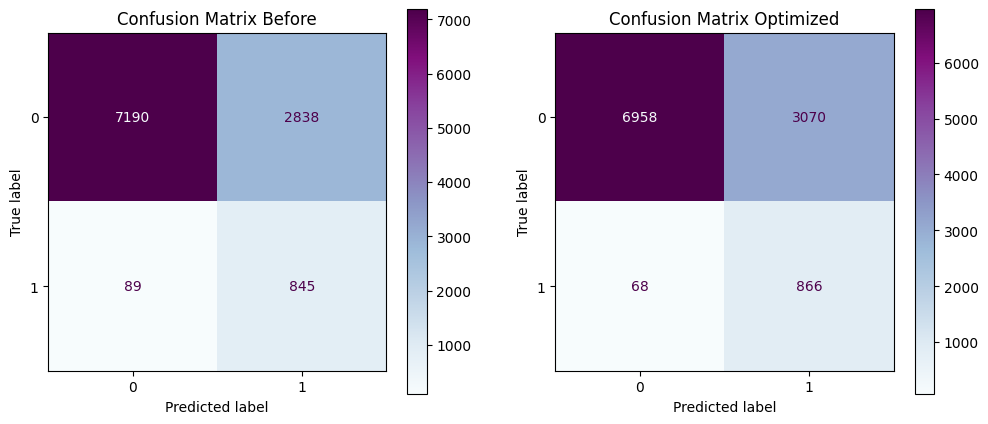

In [403]:
disp_before = ConfusionMatrixDisplay(cm_before)
disp_after = ConfusionMatrixDisplay(cm_after)

fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].set_title('Confusion Matrix Before')
axes[1].set_title('Confusion Matrix Optimized')
disp_before.plot(ax=axes[0], cmap='BuPu')
disp_after.plot(ax=axes[1], cmap='BuPu')

In [404]:
preprocessor = Pipe_model[0]  # Asumsi Pipe_model[0] adalah ColumnTransformer
feature_names = []

for transformer in preprocessor.transformers_:
    tr_name, tr_model, tr_columns = transformer
    if tr_name == 'remainder' and tr_model == 'passthrough':
        # Tambahkan kolom yang tidak diproses (jika ada)
        feature_names.extend(tr_columns)
    elif hasattr(tr_model, 'get_feature_names_out'):
        # Ambil nama fitur dari transformer (misal: OneHotEncoder)
        feature_names.extend(tr_model.get_feature_names_out(tr_columns))
    else:
        # Ambil nama kolom asli (misal: StandardScaler tidak mengubah nama)
        feature_names.extend(tr_columns)

# Pastikan jumlahnya sama dengan feature_importances_
print(len(feature_names), len(Pipe_model['modeling'].feature_importances_))  # Harus 25 25

df_coef = pd.DataFrame({
    "feature": feature_names,
    "importances": Pipe_model['modeling'].feature_importances_
}).sort_values(by='importances', ascending=False)

25 25


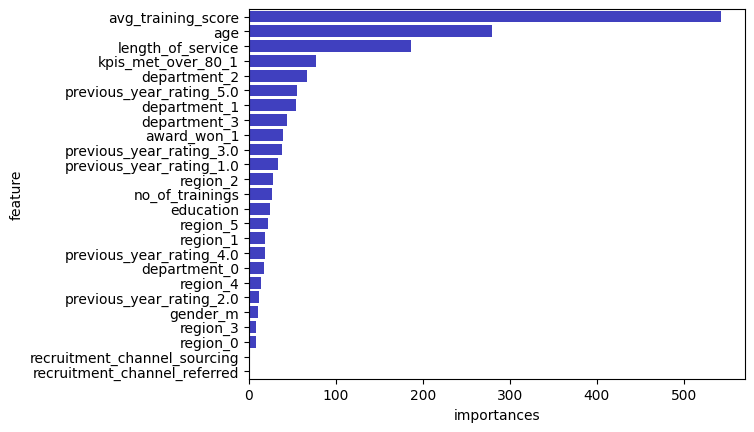

In [405]:
sns.barplot(data=df_coef, x='importances', y='feature', color='blue', saturation=0.5)
plt.show()

Feature importance menunjukkan seberapa besar pengaruh setiap fitur terhadap keputusan model.

**Summary**

- The model relies most heavily on **avg_training_score**, followed by **age** and **length_of_service**, indicating that these features play the biggest role in predicting promotion likelihood.  
- Other influential factors include **KPI performance**, **department**, and **previous year ratings**, especially **rating_5.0**, reinforcing the impact of individual performance and functional area.  
- Features like **recruitment_channel_referred**, **recruitment_channel_sourcing**, **region_3**, and **gender** have very low importance, suggesting they contribute minimally to model accuracy.  
- This ranking can guide feature selection by focusing on the most impactful variables and potentially simplifying the model by removing low-importance attributes.

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 3734, number of negative: 

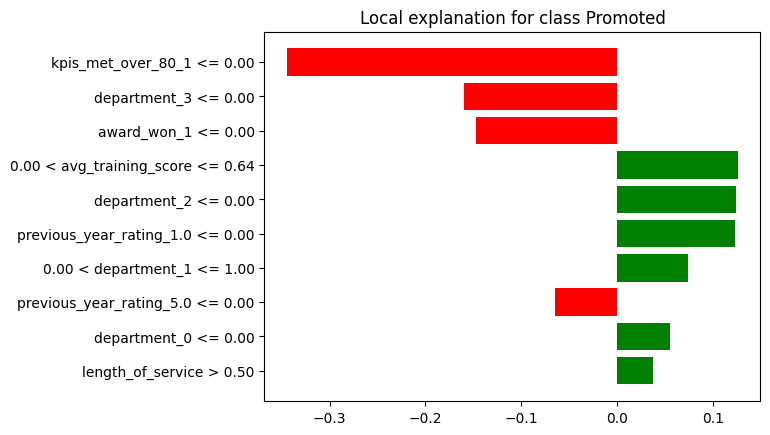

In [406]:
import lime
from lime import lime_tabular

rf_lime = Pipe_model
rf_lime.fit(X_train, y_train)
score = rf_lime.score(X_test, y_test)

preprocessor = Pipe_model.named_steps['preprocessing']

# Transform data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed.values, 
    feature_names=feature_names,
    class_names=['Not Promoted', 'Promoted'],
    mode='classification'
)

# Try to the observation 6
# Lets compare with the real result
print(f"The prediction must predict this customer is: {('Promoted' if y_test.iloc[1] == 1 else 'Not Promoted')} from y_test")

exp = explainer.explain_instance(X_test_processed.iloc[0].values, 
                                 Pipe_model[-1].predict_proba, 
                                 num_features=10)
exp.as_pyplot_figure();

**Based on SHAP value analysis, we've identified the most influential features affecting promotion predictions:**

- **KPIs Met Over 80% (kpIs_met_over_80_1):**  
This feature has the strongest negative impact on the prediction of promotion. Employees who **did not meet KPI targets** are significantly less likely to be promoted, indicating that performance benchmarks are a critical determinant for advancement.

- **Department_3:**  
Being in Department 3 negatively influences promotion predictions. This could suggest structural or policy-based limitations within that department regarding career progression, or possibly higher competition.

- **Average Training Score (avg_training_score):**  
Higher training scores positively influence promotion likelihood. Employees with **above-average training performance (between 0.00 and 0.64)** are more likely to be promoted, suggesting that investment in training and skill development plays a role in career growth.

- **Previous Year Rating 1.0:**  
Employees with the **lowest previous year rating** are less likely to be promoted, while higher ratings contribute positively. This reflects how **past performance evaluations** significantly weigh into promotion decisions.

- **Department_2:**  
Belonging to Department 2 shows a positive contribution to promotion, in contrast to Department 3. This could indicate that Department 2 offers more promotion opportunities or has more favorable performance conditions.

- **Award Won:**  
Surprisingly, winning an award (award_won_1) shows a **negative** impact on promotion likelihood in this specific case, which may be influenced by the context of other variables (e.g., department or rating). This suggests that award recognition alone is not a standalone predictor of promotion.

- **Other contributing factors:**  
    - **Department_1** has a mild positive impact.  
    - **Longer length of service** contributes slightly positively, aligning with seniority-based promotion systems.  
    - **Department_0** contributes positively but to a lesser extent, suggesting some variation across departments.

# **Conclusion**

In [407]:
from sklearn.metrics import classification_report, confusion_matrix


report_tuned = classification_report(y_test, y_pred_after)

print('Classification Report after Tuned Logitic Regression : \n', report_tuned)

Classification Report after Tuned Logitic Regression : 
               precision    recall  f1-score   support

           0       0.99      0.69      0.82     10028
           1       0.22      0.93      0.36       934

    accuracy                           0.71     10962
   macro avg       0.61      0.81      0.59     10962
weighted avg       0.92      0.71      0.78     10962



The main metric that we will use is `Recall`. Therefore, this model is very suitable to use if the main goal is to minimize customer loss

After cross validation and hyper parameter tuning, this model gets a prediction score before tuning of 90% and gets a prediction score after tuning of 92% with the Recall metric. The final model selected for use is Light Gradient Boosting with parameters num_leaves: 30, min_data_in_leaf: 100, max_depth: 15, lambda_l1: 10, feature_fraction: 0.85, and bagging_fraction: 0.8.

Based on the classification report results from the model with the metric used is Recall, we can conclude that when this model is used, this model can identify 69% of Employees who are not promoted and can identify 93% of Employees who will be promoted. If we look at its precision, the possibility of our model correctly predicting Employees who are promoted is 22%. then there are still around 22% of Employees who are predicted to be promoted when in fact they are not promoted. 

If we look back at the metric evaluation above, FN has a more detrimental impact than FP. As we have explained above, the cost for FP is IDR 300,000 and the cost for FN is 4x more than the cost of FP, which is IDR 1,300,000. The employees we currently have are 54,808 with 4,668 promoted Employees and 50,140 non-promoted Employees. The number of Employees in the confusion metric is 10,962 or 1/5 of the total Employees. 

Therefore, we will calculate the costs incurred and compare the costs before using the model with after using the model. Here is the calculation:
1. **Costs incurred before using the model**
- Rumus:
- Expenses for promoted employees (pe) = total promoted employees * FP
- expenses for non-promoted employees(npe) = total non-promoted employees * FN
- total = npe + pe
- jawaban:
- pe = 4.668 * 300.000 = 1.400.400.000
- npe = 50.140 * 1.300.000 = 65.182.000.000
- total = 1.400.400.000 + 65.182.000.000 = Rp.66.582.400.000

2. **Costs incurred after using the model**
- Rumus:
- employee FP dari confusion metrix = 3070
- employee FN dari confusion metrix = 68
- jika dihitung biaya pengeluarannya adalah:
- FP = sum FP * cost FP
- FN = sum FN * cost FN
- total = FP + FN
- Jawaban:
- FP = 3070 * 300.000 = 921.000.000
- FN = 68 * 1.300.000 = 88.400.000
- total = 921.000.000 + 88.400.000 = Rp.1.000.400.000

Because the number of employees in the confusion metric is 1/5 of the total employees. then the total will be multiplied by 5. So the result is Rp5,002,000,000

3. **The difference in costs before using the model and after using the model**
- Rumus:
- selisih = total before using the model - total after using the model
- selisih = Rp.66.582.400.000 - Rp5,002,000,000
- selisih = Rp.61.580.400.000

**PERBANDINGAN PENGGUNAAN MACHINE LEARNING**
- before using the Machine Learning: The company incurs costs amounting to Rp.66.582.400.000
- after using the Machine Learning: the company only spends a fee of Rp5,002,000,000

It can be concluded that Machine Learning using the Light Gradient Boosting algorithm has succeeded in reducing costs by Rp. 61,580,400,000.


# **Recommendation**

Based on the evaluation results, it is strongly recommended that the company implement the Machine Learning model using the Light Gradient Boosting algorithm with the selected hyperparameters. The primary reason is its significant potential to minimize financial losses by effectively reducing the number of False Negatives, which carry a higher cost impact compared to False Positives.

With this model, the company can reduce total costs related to employee promotion decisions from Rp.66,582,400,000 to Rp.5,002,000,000, achieving a cost efficiency of Rp.61,580,400,000. This outcome confirms that the model is highly effective in identifying employees who should and should not be promoted, especially prioritizing the reduction of costly misclassifications.

Therefore, it is advisable for the company to integrate this model into the decision-making process for employee promotions to optimize operational costs and improve overall efficiency.

In [408]:
import pickle

# Define final model
final_model = Pipe_model

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('Machine_Learning_for_promotion.sav', 'wb'))

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 4668, number of negative: 